# Анализ рынка недвижимости Санкт-Петербурга

**Задача проекта:** Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир 


### Загрузка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) #Подключаем отображение всех столбцов датафрейма

Считываем файл и сохраняем его в переменной data.

In [2]:
data = pd.read_csv('... .csv', sep = '\t')

Изучаем основную информацию о датафрейме.

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Строим общую гистограмму для всех рядов.

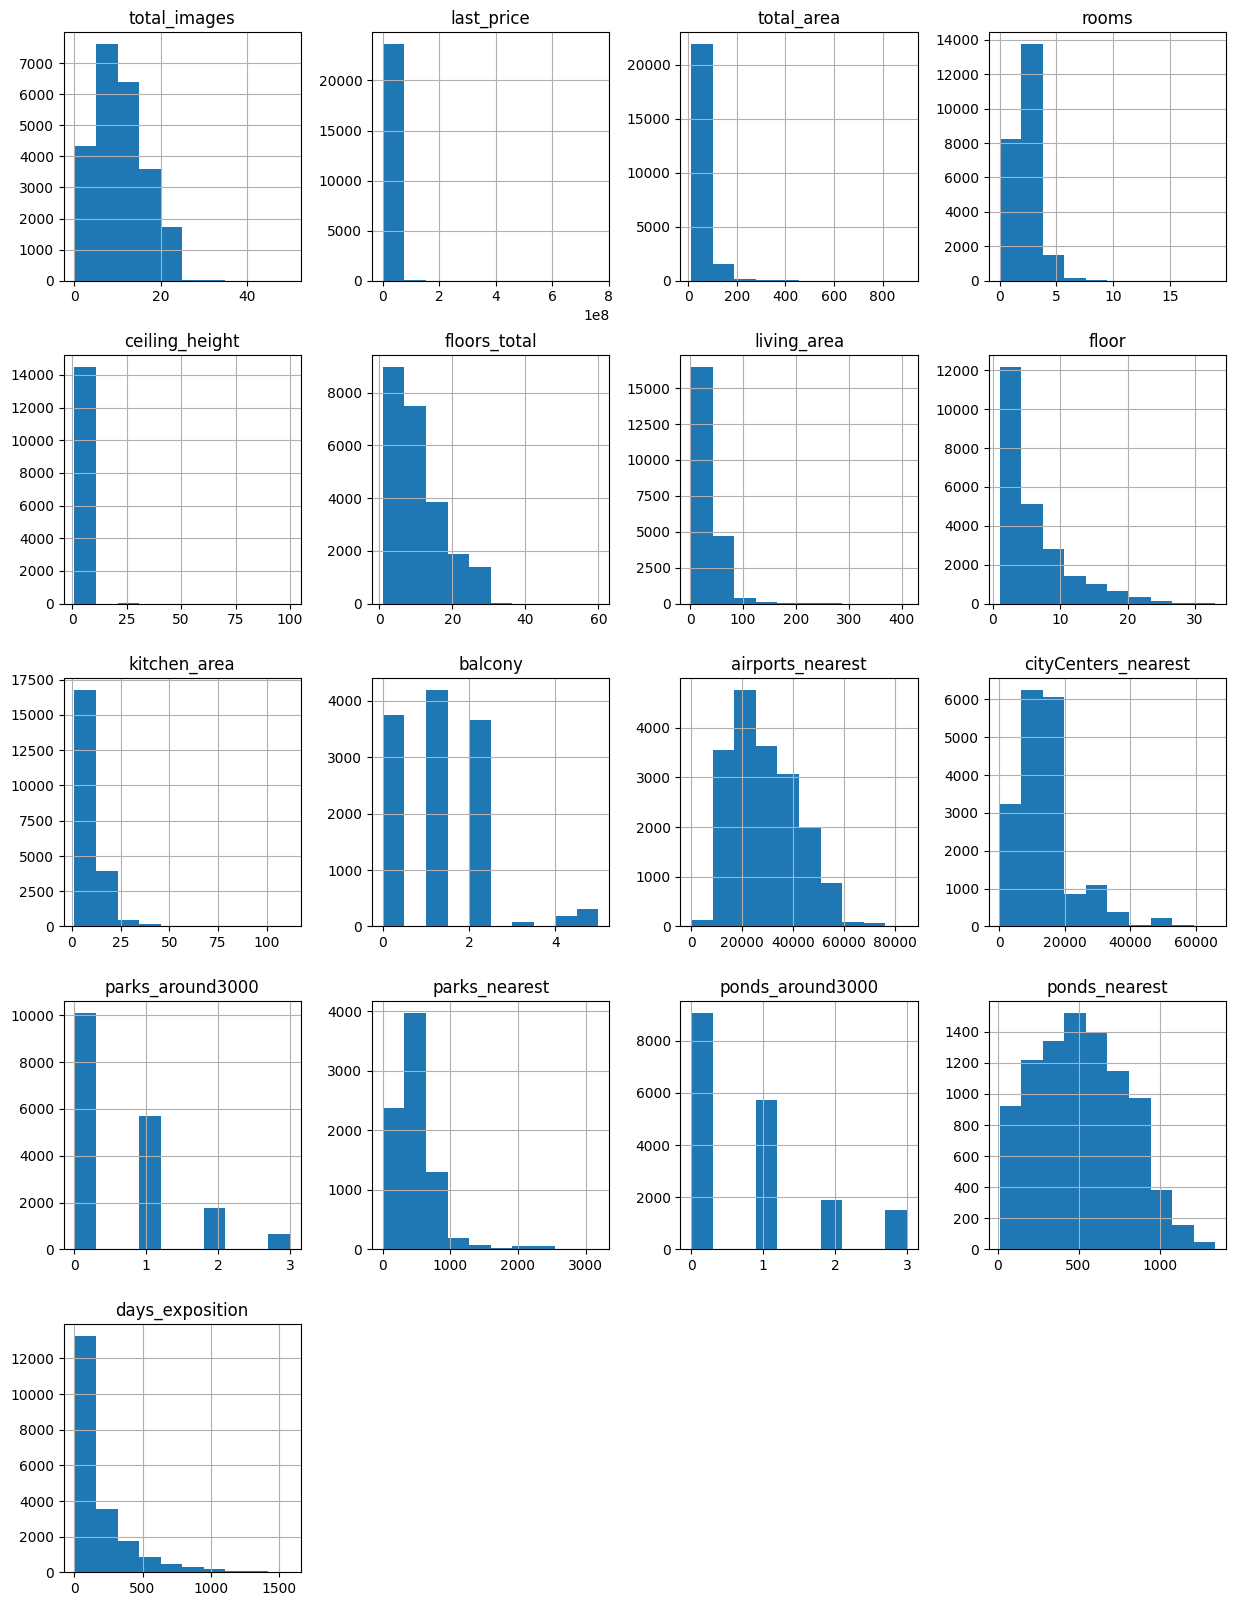

In [6]:
data.hist(figsize=(15, 20));

**Вывод:**  
Датафрейм состоит из 22 столбцов и 23699 строк.  
В большинстве столбцов имеются пропущенные значения, в некоторых - некорректный тип данных.  
По ряду признаков присутствуют  аномальные и выбивающиеся значения, что видно по построенным гистограммам.  
Принято решение проработать каждый столбец индивидуально.  

### Предобработка данных

Зафиксируем количество строк в исходном датафрейме.

In [8]:
row_q = data.shape[0]

####  Общие операции с датафреймом

#####  Переименование столбца "cityCenters_nearest"
Название столбца "cityCenters_nearest" переведено в "змеиный регистр".

In [9]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'})

#####  Выявление явных дубликатов

Исходный датафрейм проверен на наличие явных дубликатов. Явные дубликаты отсутствуют.

In [10]:
data.duplicated().sum()

0

А также проверено дублирование строк по столбцам без пропусков. 

In [11]:
(data[data[['last_price', 'total_area', 'first_day_exposition', 'rooms', 'floor']]
      .duplicated(keep=False)].sort_values(['last_price', 'first_day_exposition']))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7943,0,3000000.0,36.0,2018-02-01T00:00:00,1,2.60,9.0,19.3,8,NaN,False,False,7.00,2.0,Санкт-Петербург,19307.0,18309.0,0.0,NaN,1.0,71.0,45.0
21845,17,3000000.0,36.0,2018-02-01T00:00:00,1,2.50,9.0,19.0,8,NaN,False,False,8.30,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,44.0
4358,11,3300000.0,45.2,2018-10-18T00:00:00,2,2.60,9.0,26.8,3,NaN,False,False,6.30,2.0,Красное Село,24723.0,28148.0,0.0,NaN,0.0,NaN,132.0
8668,12,3300000.0,45.2,2018-10-18T00:00:00,2,NaN,9.0,26.8,3,NaN,False,False,6.30,NaN,Красное Село,NaN,NaN,NaN,NaN,NaN,NaN,132.0
16394,2,3300000.0,30.0,2019-04-11T00:00:00,1,2.50,4.0,16.1,1,NaN,False,False,5.28,NaN,Санкт-Петербург,21361.0,23072.0,0.0,NaN,1.0,846.0,NaN
17641,6,3300000.0,30.0,2019-04-11T00:00:00,1,2.55,5.0,17.0,1,False,False,False,5.00,NaN,Санкт-Петербург,10504.0,12121.0,0.0,NaN,0.0,NaN,21.0
5155,10,7400000.0,84.1,2017-04-14T00:00:00,2,2.50,5.0,39.9,4,NaN,False,False,20.60,NaN,Санкт-Петербург,21195.0,1181.0,1.0,725.0,3.0,138.0,342.0
17989,12,7400000.0,84.1,2017-04-14T00:00:00,2,NaN,5.0,39.9,4,NaN,False,False,20.60,NaN,Санкт-Петербург,22475.0,1310.0,0.0,NaN,3.0,174.0,402.0


В ходе визуального анализа выявлено дублирование строк с индесами 4358 и 8668. Принято решение удалить строку 8668, ввиду большего количества пропущенных значений. По остальным строкам дублирование не подтверждено, так как имеются явные различия в значениях некоторых столбцов.

In [12]:
data = data[data.index !=8668]

#####  Работа с выбросами
<a id="primer"></a>

Общая гимтограмма столбцов датафрейма позволяет предполагать наличие аномально больших значений и выбросов в столбцах 'last_price', 'total_area', 'rooms', 'floor', 'ceiling_height', 'kitchen_area', 'living_area','floors_total'.  

Так как столбцы 'last_price', 'total_area', 'rooms', 'floor' не имеют пропусков, удаление строк с выбросами можно провести на начальном этапе предобработки.

Возможность и необходимость удаления выбросов по столбцам 'ceiling_height', 'kitchen_area', 'living_area','floors_total', ввиду наличия пропущенных значений будет определена на заключительном этапе предобработки, после работы с пропусками.

Для того, чтобы исключить сдвиги в границах нормальных значений, зафиксируем значения 1 и 3 квартилей по каждому из столбцов, в которых планируется удаление выбросов, по исходному датафрейму до удаления выбросов.

In [13]:
normal = {} 
for column in ['last_price', 'total_area', 'rooms', 'floor']:
    normal[column] = [data[column].quantile(0.25)]
    normal[column].append(data[column].quantile(0.75))

In [14]:
normal_2 = {} 
for column in ['ceiling_height', 'kitchen_area', 'living_area', 'floors_total']:
    normal_2[column] = [data[column].quantile(0.25)]
    normal_2[column].append(data[column].quantile(0.75))

Удалим выбросы в столбцах 'last_price', 'total_area', 'rooms', 'floor'.

In [15]:
for i,j in normal.items():
    iqr = j[1] - j[0]
    data = data.loc[(data[i] < (j[1] + 1.5*iqr)) & (data[i] > (j[0] - 1.5*iqr))]

In [16]:
print(f'Удалено {((row_q - data.shape[0])/row_q):.1%} строк')

Удалено 13.9% строк


**Вывод** В ходе проведения общих операций с датафреймом откорректировано название столбца "city_centers_nearest", удалена одна строка-дубликат, а также строки, содержащие знавчения, явно выделяющиеся из общей выборки(выбросы). В результате проведенных действий удалено 13,9% строк датафрейма.

####  Столбец 'total_images' (число фотографий квартиры в объявлении) 

Рассмотрим основную статистическую информацию о столбце, а также построим гистограмму значений столбца.

dtype('int64')

count    20409.000000
mean         9.674947
std          5.524994
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

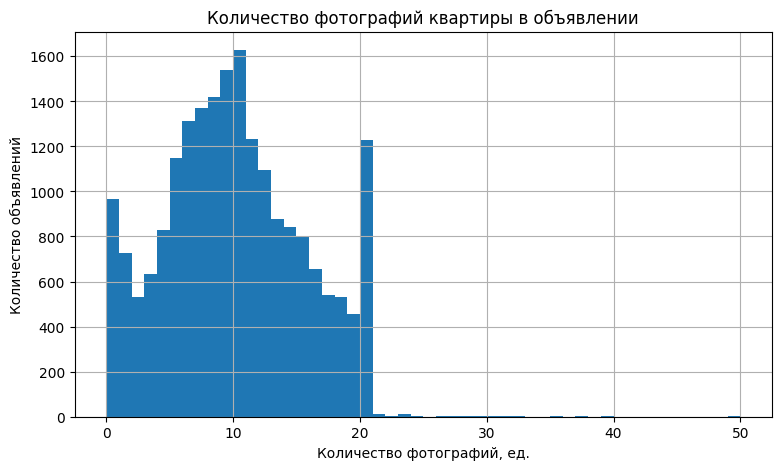

In [17]:
display(data['total_images'].dtype)
display(data['total_images'].describe())
data['total_images'].hist(range=(0,50), bins = 50, figsize = (9, 5))
plt.title('Количество фотографий квартиры в объявлении')
plt.xlabel('Количество фотографий, ед.')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:** Пропущенные значения в столбце отсутствует. Тип данных соответствует.  
В Большинстве объявлений загружено от 0 до 20 фотографий. Имеется незначительное количество объявлений с большим числом фотографий.  
В целом столбец корретный, пропусков и аномальных значений не имеется.

#### Столбец 'last_price' (цена на момент снятия с публикации)

Посмотрим данные описательной статистики.

In [18]:
data['last_price'].describe()

count    2.040900e+04
mean     4.778719e+06
std      2.182680e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.371192e+06
75%      5.935000e+06
max      1.189440e+07
Name: last_price, dtype: float64

Цены квартир  в датафрейме представлены в рублях, что затрудняет работу с данными в связи с большим количеством порядков.
Рассмотрим возможность преобразования столбца в тысячи.

In [19]:
data[data['last_price'] % 1000 == 0]['last_price'].count() / data['last_price'].count()

0.9743740506639228

Более чем в 97 %  объявлений стоимость кратна одной тысяче рублей.  
Преобразуем значения в тысячи рублей. 

In [20]:
data['last_price'] = data['last_price'] / 1000

In [21]:
data['last_price'].describe()

count    20409.000000
mean      4778.718983
std       2182.679918
min        430.000000
25%       3300.000000
50%       4371.192000
75%       5935.000000
max      11894.400000
Name: last_price, dtype: float64

Построим гистограмму значений столбца.

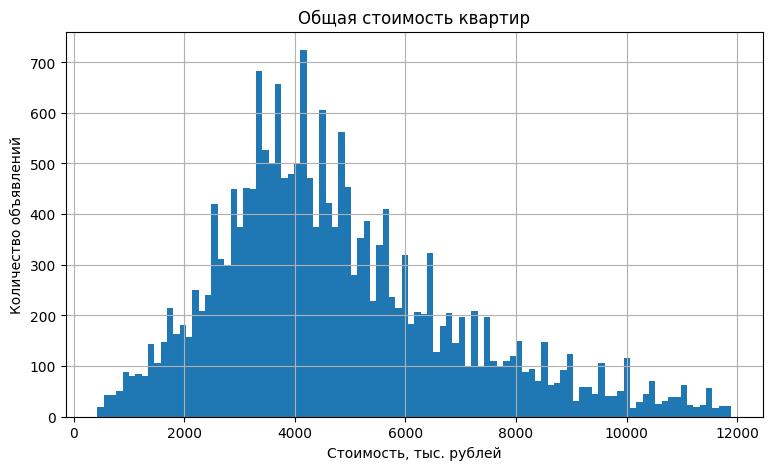

In [22]:
data['last_price'].hist(bins = 100,  figsize = (9, 5))
plt.title('Общая стоимость квартир')
plt.xlabel('Стоимость, тыс. рублей')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:**  Столбец корректный, изменение типа данных не требуется.

#### Столбец "total_area" (общая площадь квартиры в квадратных метрах)

Рассмотрим основную статистическую информацию о столбце, а также построим гистограмму.

dtype('float64')

count    20409.000000
mean        52.708317
std         17.660535
min         12.000000
25%         39.000000
50%         49.100000
75%         63.000000
max        114.500000
Name: total_area, dtype: float64

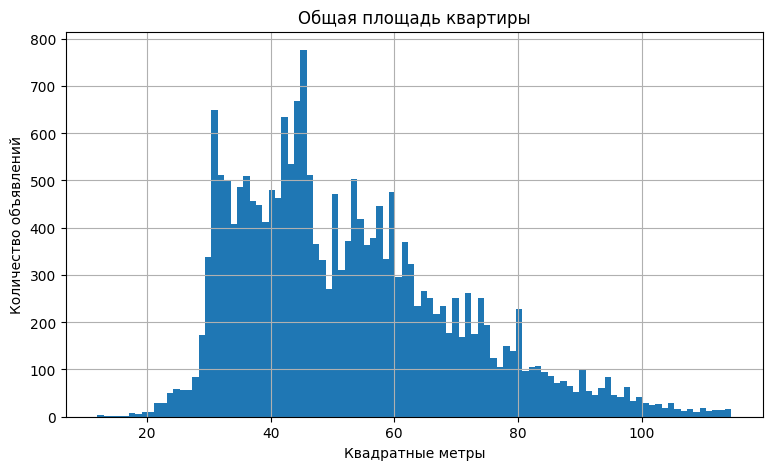

In [23]:
display(data['total_area'].dtype)
display(data['total_area'].describe())
data['total_area'].hist(bins = 100, figsize = (9, 5))
plt.title('Общая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:** В целом столбец корректный. Пропущенные значения отсутствуют, тип данных соответствует. 

####  Столбец "first_day_exposition" (дата публикации)

Пропущенные значения в столбце отсутствуют. Тип данных переводим в datetime64 и округляем до дней.

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.round('1D')

In [25]:
display(data['first_day_exposition'].dtype)
data.head() # убедился в корректности результата

dtype('<M8[ns]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


####  Столбец "rooms" (число комнат)

Посмотрим данные описательной статистики, а также построим гисторгамму столбца.

dtype('int64')

count    20409.000000
mean         1.931207
std          0.888188
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

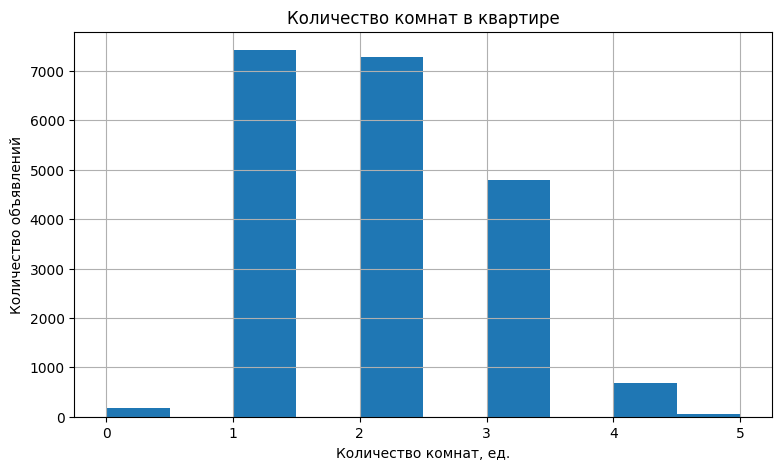

In [26]:
display(data['rooms'].dtype)
display(data['rooms'].describe())
data['rooms'].hist(bins = 10, figsize = (9, 5))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат, ед.')
plt.ylabel('Количество объявлений')
plt.show() 

В поле "количество комнат" встречаются нули. Это могут быть квартиры, имеющие свободную планировку, либо студии.
Уточним количество квартир с нулевым значением комнат, не относящихся к данным категориям.

In [27]:
data[(data['rooms'] == 0) & ~(data['open_plan'] | data['studio'] )]['rooms'].count() 

0

In [28]:
data[(data['rooms'] != 0) & (data['studio'] )]['rooms'].count() 

11

При этом  некоторые пользователи посчитали студии однокомнатными. Приведем этот параметр к однообразию - всем студиям назначим количество комнат 0.

In [29]:
data.loc[data['studio'], 'rooms'] = 0

**Вывод:** В целом столбец корректный. Пропущенные значения отсутствуют, тип данных соответствующий. 

####  Столбец floors_total (всего этажей в доме)

Рассмотрим основную информацию о столбце.

dtype('float64')

count    20348.000000
mean        10.142127
std          6.098353
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

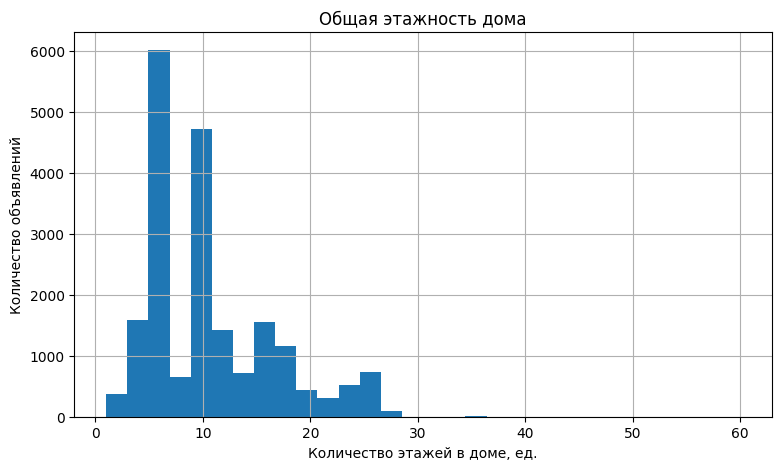

In [30]:
display(data['floors_total'].dtype)
display(data['floors_total'].describe())
data['floors_total'].hist(bins = 30, figsize = (9, 5))
plt.title('Общая этажность дома')
plt.xlabel('Количество этажей в доме, ед.')
plt.ylabel('Количество объявлений')
plt.show()

В столбце присутствуют пропущенные значения.  
Первоначально определим долю пропущенных значений.

In [31]:
data['floors_total'].isna().sum()/data['floors_total'].count()

0.002997837625319442

Пропущенных значений менее 0,3%. В данном случае целесообразнее бедет пренебречь строками с пропущенными значениями. 
Также приведем данные в целочисленный тип.

In [32]:
data = data.dropna(subset =['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

**Вывод:** Столбец приведен в корректное состояние. Устранены пропуски и данные приведены в целочисленный тип. 
Гистограмма показывает наличие выбивающихся значений. Удаление выбросов проведен в конце предобработки данных.

#### Столбец "ceiling_height" (высота потолков (м))

Посчитаем количество пропущенных значений, а также рассмотрим описательную статистику. 

In [33]:
display(data['ceiling_height'].dtype)
display(data['ceiling_height'].isna().sum())
data['ceiling_height'].describe()

dtype('float64')

7888

count    12460.000000
mean         2.723672
std          0.981576
min          1.000000
25%          2.500000
50%          2.600000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

Целесообразно построить гистограммы столбца по диапазонам.

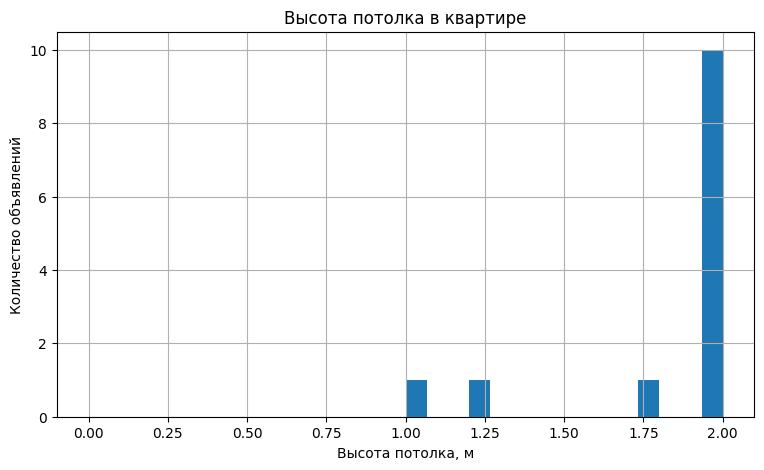

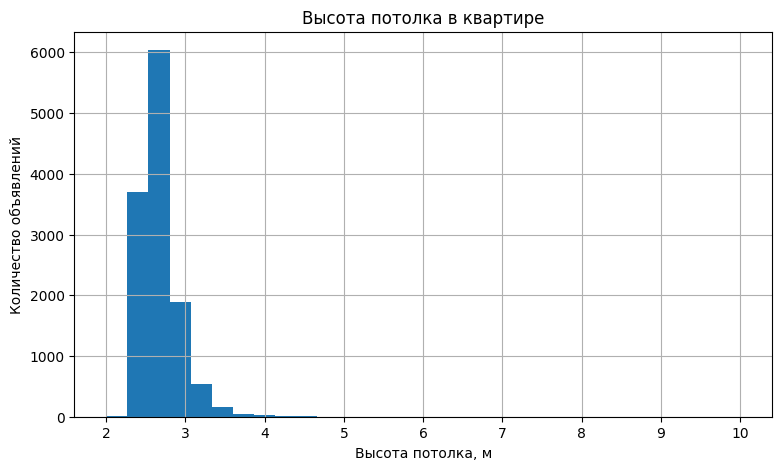

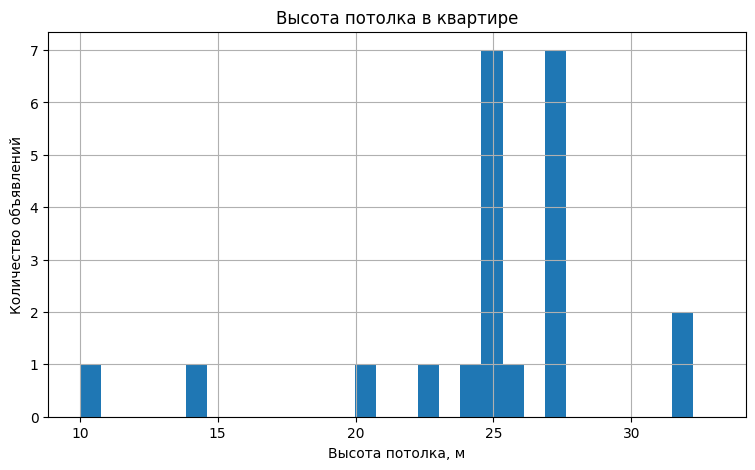

In [34]:
data['ceiling_height'].hist(bins = 30,range = (0, 2), figsize = (9, 5))
plt.title('Высота потолка в квартире')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')
plt.show()
data['ceiling_height'].hist(bins = 30, range = (2, 10), figsize = (9, 5))
plt.title('Высота потолка в квартире')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')
plt.show()
data['ceiling_height'].hist(bins = 30, range = (10, 33), figsize = (9, 5))
plt.title('Высота потолка в квартире')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')
plt.show()

В первую очередь обращает на себя внимание большое количество аномальных значений.  
В России стандарной высотой потолков считается 2,65 м. Однако часто встречаются квартиры с высотой потолков от 2 до 6 метров включительно.
На гистограмме видно, что у порядка 20 квартир указана высота потолков от 20 до 35 м. Это вполне вероятно вызвано сдвигом десятичного разделителя при заполнении значений. 
Разделим значения высоты потолков у квартир с высотой более 15 м на 10.

In [35]:
data.loc[data['ceiling_height'] > 15,'ceiling_height'] = data['ceiling_height'] / 10

Наиболее подходящим вариантом заполнения пропущенных значений в данном столбце является заполнение медианным значением в разрезе общей этажности зданий. Так как имеется тенденция, что в домах с малым числом этажей обычнообычно более высокие потолки, в многоэтажках же высота потолков ниже. Кроме того дома типовой застройки строились по единому проекту, зачастую с фиксированной этажностью, высотой потолков и т.д. 

In [36]:
for i in data['floors_total'].unique():
    data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == i), 'ceiling_height'].median()

Посчитаем количество квартир с высотой потолка менее 2 и более 6 метров.

In [37]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 6)]['ceiling_height'].count()

9

Так как количество таких срок сравнительно небольшое, данные строки удаляем.

In [38]:
data = data.loc[(data['ceiling_height'] > 2) | (data['ceiling_height'] < 6)]

**Вывод:** Произведена замена пропущенных значений в столбце. Часть аномальных значений откорректирована, строки с значениями, не поддающимися корректировке - удалены.

#### Столбец "floor" (этаж)

В данном столбце пропуски отстуствуют. Тип данных соответствует. С целью поиска аномальных и выбивающихся значений просмотрим описательную статистику. А также построим гистограмму.

dtype('int64')

count    20348.000000
mean         5.159377
std          3.733019
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         16.000000
Name: floor, dtype: float64

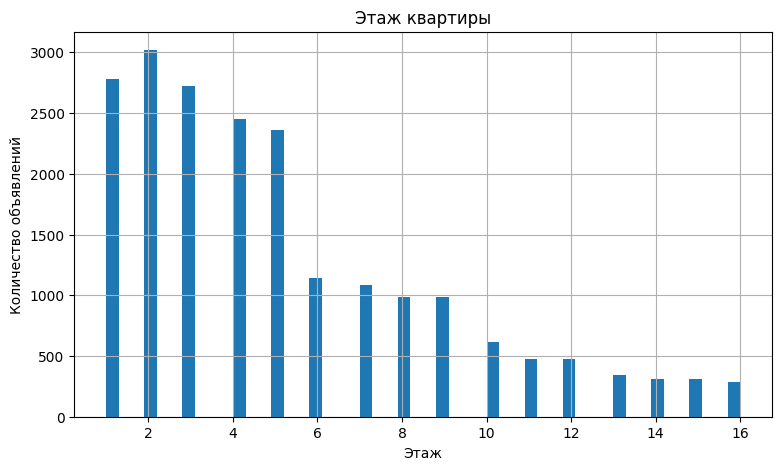

In [39]:
display(data['floor'].dtype)
display(data['floor'].describe())
data['floor'].hist(bins = 50, figsize = (9, 5))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

Кроме того рассмотрим на предмет превышения указанного этажа общей этажности дома.

In [40]:
data[data['floor'] > data['floors_total']]['floor'].count()

0

 Некорректные значения отсутствуют.

**Вывод:** В целом столбец доработок не требует.

####  "is_apartment" (апартаменты).
В столбце имеется большое количество пропущенных значений.
Так как апартаменты не так сильно распространены в России, считаем, что пропущенные значения - не апартаменты.
Кроме того изменим тип данных на 'bool'.

In [41]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

####  Столбец "kitchen_area" (площадь кухни в квадратных метрах (м²))

В столбце присутствуют пропущенные значения. 
Для выявления аномальных и выбивающихся значений рассмотрим описательную статистику, а также построим гистограмму столбца.

dtype('float64')

count    18468.000000
mean         9.448725
std          3.726034
min          1.300000
25%          7.000000
50%          8.800000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

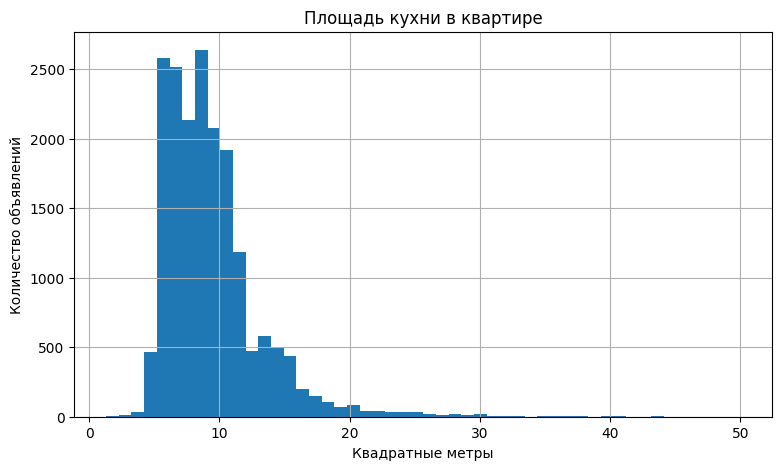

In [42]:
display(data['kitchen_area'].dtype)
display(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins = 50, figsize = (9, 5))
plt.title('Площадь кухни в квартире')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()

В первую очередь проверим, заполнены ли  значения площади кухни в квартирах c нулевым значением комнат и заполним их нулями, так как обычно площадь кухни в таких квартирах не выделяют.

In [43]:
data.loc[data['rooms'] == 0, 'kitchen_area'].unique()

array([nan])

In [44]:
data.loc[data['rooms'] == 0, 'kitchen_area'] = 0

При заполнении пропущенных значений руководствовался логикой, что оптимальнее всего будет умножить общую площадь на коэффициент, расчитанный как отношение медианной площади кухни к медианной общей площади квартиры.
В качестве критерия группировки выбрал количество комнат в квартире - так как он наиболее точно отражает данное соотношение. 
В квартирах старой застройки площадь кухни одинакова для 1,2,3 - комнатных квартир.  
Для этих целей сформировал сводную таблицу, рассчитал в ней необходимые коэффициенты(также коэффициенты для последующего заполнения пропусков в столбце с жилой площадью), и объеденил ее с исходным дата-фреймом.

In [45]:
index_table = (data
               .pivot_table(index = 'rooms', values = ['kitchen_area','living_area', 'total_area'], aggfunc = 'median')
               .reset_index())
index_table['kitchen_index'] = index_table['kitchen_area'] / index_table ['total_area']
index_table['living_index'] = index_table['living_area'] / index_table ['total_area']
index_table = index_table[['rooms', 'kitchen_index','living_index']]
data = data.merge(index_table, on = 'rooms')

Значения площади кухни менее 4 квадратных метров считаем аномальными. 
Производим замену пропущенных и аномальных значений в столбце 'kitchen_area'.

In [46]:
data.loc[(data['kitchen_area'].isna()) | (data['kitchen_area'] < 4), 'kitchen_area'] = \
data['total_area'] * data['kitchen_index']

In [47]:
data['kitchen_area'].isna().sum()

0

**Вывод:** Пропуски и аномальные значения заменены на медианные значения. Возможные выбросы проработаем в конце этапа предобработки.

#### Столбец "living_area" (жилая площадь в квадратных метрах (м²))

Уточним количество пропущенных значений.

In [48]:
data['living_area'].isna().sum()

1550

Рассмотрим описательную статистику, а также построим гистограмму столбца.

dtype('float64')

count    18798.000000
mean        30.406359
std         12.744993
min          2.000000
25%         18.200000
50%         29.300000
75%         39.200000
max         93.600000
Name: living_area, dtype: float64

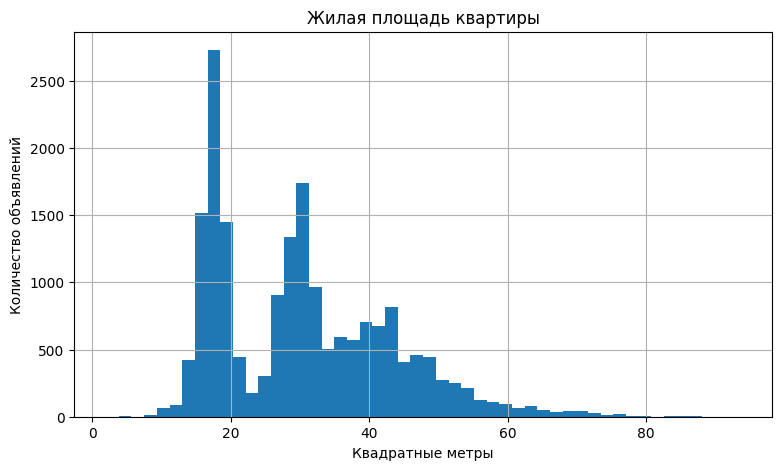

In [49]:
display(data['living_area'].dtype)
display(data['living_area'].describe())
data['living_area'].hist(bins = 50, figsize = (9, 5))
plt.title('Жилая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объявлений')
plt.show()

Обращает на себя внимание наличие строк с жилой площадью менее 9 квадратных метров. 
Рассмотрев подробнее данные строки - эти значения также принимаем за аномальные.

In [50]:
data[data['living_area'] <9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_index,living_index
41,5,4000.0,21.4,2019-02-07,1,2.90,8,8.3,7,False,False,False,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN,0.247253,0.486264
5079,13,3799.0,31.0,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,0.247253,0.486264
5358,20,5300.0,33.0,2017-04-14,1,2.70,22,8.9,16,False,False,False,16.1,1.0,Санкт-Петербург,33803.0,13671.0,0.0,NaN,0.0,NaN,216.0,0.247253,0.486264
6676,9,4100.0,35.3,2018-01-10,1,2.75,27,8.5,11,False,False,False,16.1,2.0,Санкт-Петербург,33977.0,15076.0,0.0,NaN,0.0,NaN,60.0,0.247253,0.486264
7209,12,4800.0,37.0,2016-02-24,1,2.60,14,8.0,11,False,False,False,22.0,0.0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0,0.247253,0.486264
8087,10,4200.0,62.4,2017-06-15,2,2.60,9,8.4,6,False,False,False,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0,0.161538,0.578846
11605,20,6350.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,0.161538,0.578846
13816,7,8900.0,50.6,2018-10-22,2,2.50,7,8.0,3,False,False,False,31.0,NaN,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN,0.161538,0.578846
20056,15,6100.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,0.109489,0.666667
20232,11,2680.0,22.0,2018-08-11,0,2.75,25,5.0,8,False,True,False,0.0,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,0.000000,0.686237


Заменим пропущенные и аномальные значения в столбце.

In [51]:
data.loc[(data['living_area'].isna()) | ( data['living_area'] < 9) , 'living_area'] = \
data['total_area'] * data['living_index']

Помимо кухни, в квартирах присутствуют другие объекты, относящиеся к нежилой площади, такие как санузлы, коридоры, занимающие минимум 10% от общей площади квартиры.
Так как площадь данных объектов в датафрейме не фигурирует, проверим датафрейм на наличие строк, в которых 90% общей площади меньше суммы жилой площади и площади кухни. 
В данных строках также проводим замену значений в столбцах.

In [52]:
data[data['living_area'] + data['kitchen_area'] > 0.9 * data['total_area']]['living_area'].count()

516

In [53]:
data.loc[data['living_area'] + data['kitchen_area'] > 0.9 * data['total_area'], 'kitchen_area'] = \
data['total_area'] * data['kitchen_index']

In [54]:
data.loc[data['living_area'] + data['kitchen_area'] > 0.9 * data['total_area'], 'living_area'] = \
data['total_area'] * data['living_index']

Проверим, устранились ли строки с аномальным соотношением площадей квартиры.

In [55]:
data[data['living_area'] + data['kitchen_area'] > 0.9 * data['total_area']]['total_area'].count()

0

**Вывод:** Произведена замена аномальных и пропущенных значений. Столбец приведен в корректное состояние.

####  Столбец "locality_name" (название населённого пункта)

In [56]:
display(data['locality_name'].dtype)
data['locality_name'].isna().sum()

dtype('O')

38

В столбце имеются пропущенные значения. Так как заполнить данные пропуски корректно не возможно, строки с пропущенными значениями удаляем.

In [57]:
data = data.dropna(subset =['locality_name'] )

Посчитаем количество уникальных значений в столбце, а также выведем на экран перечень уникальных значений.

In [58]:
display(data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

362

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Выявлено, что слово "поселок" записывается двумя вариантами(через "е" и "ё"). Устраним неявные дубликаты, приведя к общему виду.
Кроме того, в перечне имеются населенные пункты различных типов, имеющие одинаковое название, а также строки без указания типа населенного пункта. В данном случае исключим из столбца тип населенного пункта, считая значения неявными дубликатами.

In [59]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
names = ['садоводческое некоммерческое товарищество', 'садовое товарищество', 'коттеджный поселок','поселок станции', 'поселок городского типа', 'поселок при железнодорожной станции', 'городской поселок', 'поселок', 'деревня','село' ]
for name in names:
    data['locality_name'] = data['locality_name'].str.replace(name, "").str.strip()

In [60]:
data['locality_name'].nunique()

303

**Вывод** Столбец откорректирован. Строки с пропущенными значениями значениями удалены. Количество уникальных значений в столбце снизилось с 362 до 303.

####  Столбец "balcony" (число балконов)

In [61]:
display(data['balcony'].dtype)
data['balcony'].isna().sum()

dtype('float64')

9838

Считаем, что в квартирах, в объявлениях о продаже которых количество балконов не указано, балконы отсутствуют. Заполним пропущенные значения нулями, а также приведем столбец к целочисленному формату.

In [62]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

**Вывод** Столбец приведен в корректное состояние.

#### Cтолбцы "studio" (квартира-студия) "open_plan" (свободная планировка)

Пропущенные значения в столбцах отсутствуют. Корректировки не требуются.

####  Столбцы: "airports_nearest" , "city_centers_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest"
Данные столбцы являются картографическими. Корректное заполнение пропущенных значений в них не возможно.  
Но так как необходимо перевести их в целочисленный тип, принял решение заполнить пропуски условным значением(555555), и в последующем строки фильтровать по значениям, ему не равным.

In [63]:
list_1 = [ 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for i in list_1:
    data[i] = data[i].fillna(555555).astype('int')

**Вывод:** Столбец откорректирован. Пропуски заполнены условным значением. Тип данных переведен в целочисленный.

####  "days_exposition" (сколько дней было размещено объявление (от публикации до снятия))

In [64]:
display(data['days_exposition'].dtype)
data['days_exposition'].isna().sum()

dtype('float64')

2519

In [65]:
data['days_exposition'] = data['days_exposition'].fillna(555555).astype('int')

**Вывод:** Пропуски в данном столбце обусловлены тем, что объявление о продаже квартир не были сняты с публикации на момент выгрузки данных либо в связи с малым сроком публикации объявления, либо с невостребованностью конкретных объектов на рынке.
Заполнение пропусков каким либо усредненным значением затруднительно, так как спрос(а соответственно и быстрота продаж) зависит от многих факторов, таких как тип населенного пункта,  тип дома, количество комнат в квартире, площадь и т.п.

Заполнил пропуски аналогично столбцам с картографическим содержанием. Столбец перевел в целочисленный тип.

#### Удаление выбросов 

In [66]:
for i,j in normal_2.items():
    iqr = j[1] - j[0]
    data = data.loc[(data[i] < (j[1] + 1.5*iqr)) & (data[i] > (j[0] - 1.5*iqr))]

In [67]:
print(f'Удалено {((row_q - data.shape[0])/row_q):.1%} строк от исходного датафрейма')

Удалено 17.4% строк от исходного датафрейма


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19568 entries, 0 to 20347
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19568 non-null  int64         
 1   last_price            19568 non-null  float64       
 2   total_area            19568 non-null  float64       
 3   first_day_exposition  19568 non-null  datetime64[ns]
 4   rooms                 19568 non-null  int64         
 5   ceiling_height        19568 non-null  float64       
 6   floors_total          19568 non-null  int32         
 7   living_area           19568 non-null  float64       
 8   floor                 19568 non-null  int64         
 9   is_apartment          19568 non-null  bool          
 10  studio                19568 non-null  bool          
 11  open_plan             19568 non-null  bool          
 12  kitchen_area          19568 non-null  float64       
 13  balcony         

#### Общий вывод:
В результате предобработки данных проанализированы все столбцы датафрейма.  
В большей части столбцов произведена замена аномальных и пропущенных значений на групповые медианные, удалены аномальные значения, не поддающиеся корректировке, и выбросы.  
В столбцах с картографической информацией, а также с количеством дней публикации объявления, ввиду невозможности подбора корректного значения, замена пропусков произведена на условное значение, которое будет отфильтровано при проведении аналитических мероприятий.
Произведена корректировка типов данных по следующим столбцам:
- "first_day_exposition" переведен  в формат даты;
- "is_apartment" - в булевый тип;
- "first_day_exposition", "balcony", "parks_around3000", "ponds_around3000", "days_exposition" -  в целочисленный формат.  

В целом по итогам предобработки удалено 17,4% строк.

Можно обозначить 2 предполагаемые причины пропущенных значений:
1. Необязательность заполнения некоторых параметров при публикации объявления. Основные парметры квартиры(цена, общая площадь, количество комнат) заполнены во всех объявлениях. 
2. Некорректная работа системы, ответственной за автоматическое заполнение картографических данных, в том числе невозможность заполнения картографических данных у ряда населенных пунктов.

В качестве рекомендаций по уменьшению некорректных значений можно предложить:
1. Обязательность заполнения всех необходимых параметров при публикации объявления.
2. Установление диапазона корректных значений при заполнении информации(всплывающих пояснений).
3. Проверка корректности введенной информации на момент публикации объявления (на предмет аномальных значений, соотношение общей и жилой площади, количества комнат и балконов и т.п.)
4. Проведение работы по корректному автоматическому заполнению картографической информации.

### Добавьте в таблицу новых столбцов

Добавляем столбец со средней стоимостью квадратного метра, а также столбцы с годом, месяцем и днем недели публикации

In [69]:
data['square_meter_ price'] = data['last_price'] / data['total_area'] 
data['day_exp'] = data['first_day_exposition'].dt.weekday
data['month_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year

Категоризируем этажность квартиры и добавляем соответствующий столбец

In [70]:
def floor_insert(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['cat_floor'] = data.apply(floor_insert, axis=1)

Добавляем столбец с растоянием до центра города

In [71]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round().astype('int') #округлили, и перевели в целочисленный тип

In [72]:
display(data.head()) #визуальная проверка корректности добавленных столбцов
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_index,living_index,square_meter_ price,day_exp,month_exp,year_exp,cat_floor,city_centers_nearest_km
0,7,3350.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,False,False,11.0,2,Шушары,12817,18603,0,555555,0,555555,81,0.247253,0.486264,82.920792,1,12,2018,первый,19
1,10,2890.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,Янино-1,555555,555555,555555,555555,555555,555555,55,0.247253,0.486264,95.065789,0,9,2018,другой,556
2,6,3700.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,Парголово,52996,19143,0,555555,0,555555,155,0.247253,0.486264,99.195710,3,11,2017,другой,19
3,5,5050.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137,0.247253,0.486264,127.525253,3,11,2017,другой,14
4,1,4400.0,36.0,2016-06-23,1,3.00,6,17.0,1,False,False,False,8.0,0,Пушкин,20782,30759,0,555555,1,96,203,0.247253,0.486264,122.222222,3,6,2016,первый,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19568 entries, 0 to 20347
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             19568 non-null  int64         
 1   last_price               19568 non-null  float64       
 2   total_area               19568 non-null  float64       
 3   first_day_exposition     19568 non-null  datetime64[ns]
 4   rooms                    19568 non-null  int64         
 5   ceiling_height           19568 non-null  float64       
 6   floors_total             19568 non-null  int32         
 7   living_area              19568 non-null  float64       
 8   floor                    19568 non-null  int64         
 9   is_apartment             19568 non-null  bool          
 10  studio                   19568 non-null  bool          
 11  open_plan                19568 non-null  bool          
 12  kitchen_area             19568 n

**Вывод:** Столбцы, необходимые для дальнейшего проведения аналитических мероприятий успешно добавлены в датафрейм. Тип данных откорректирован.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

С целью изучения отдельных параметров квартиры объявлена функция, которая в качестве аргументов принимает название изучаемого параметра, и количество единиц по оси Х (бинов, по умолчанию 50), и выводит на экран гистограмму столбца с актуальным названием и наименованиями осей.

In [73]:
def analytics(columns, bins = 50, describe = True):
    names = {'total_area': ['Квадратные метры', 'Общая площадь'],
             'living_area': ['Квадратные метры', 'Жилая площадь'],
             'kitchen_area': ['Квадратные метры', 'Площадь кухни'],
             'last_price': ['Стоимость, тыс. рублей', 'Стоимость квартир'],
             'rooms': ['Количество комнат, ед.', 'Количество комнат'],
             'ceiling_height': ['Высота потолков, м', 'Высота потолков'],
             'floor':['Этаж', 'Этаж квартиры'],
             'cat_floor': ['Тип этажа', 'Тип этажа квартиры'],
             'floors_total': ['Этаж', 'Общее количество этажей в доме'],
             'city_centers_nearest': ['Расстояние, м', 'Расстояние до центра города в метрах'],
             'airports_nearest': ['Расстояние, м', 'Расстояние до ближайшего аэропорта'],
             'parks_nearest': ['Расстояние, м', 'Расстояние до ближайшего парка'],
             'day_exp': ['День публикации', 'День публикации объявления'],
             'month_exp': ['Месяц публикации', 'Месяц публикации объявления'],
             'days_exposition': ['Дни', 'Время продажи квартиры']}
    data_1 = data[data[columns] != 555555]  #фильтруем заглушки
    data_1[columns].hist(bins=bins, figsize = (9,5))
    plt.title(names[columns][0])
    plt.xlabel(names[columns][1])
    plt.ylabel('Количество квартир')
    plt.show()
    if describe: # добавил возможность вывода описательной статистики.
        print(data_1[columns].describe())
    else:
        pass

##### Общая площадь

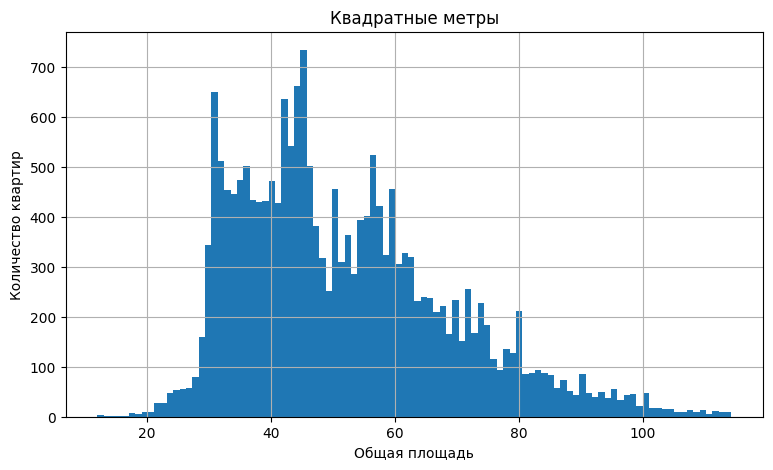

count    19568.000000
mean        51.990264
std         17.102079
min         12.000000
25%         39.000000
50%         48.200000
75%         62.000000
max        114.300000
Name: total_area, dtype: float64


In [74]:
analytics('total_area', 100)

**Вывод:** Общая площадь квартир в представленной  выборке варьируется от 12 до 114 квадратных метров. Основную массу составляют квартиры площадью от 30 до 80 квадратных метров.  Имеются пиковые значения показателя в районе 30,45 и 55 квадратных метров, вероятнее всего обусловленные площадью 1,2 и 3-комнатных квартир типовой застройки, а также общей долей таких квартир в выборке. Среднее значение показателя - 52 квадратных метра, медианное - 48,2.


##### Жилая площадь

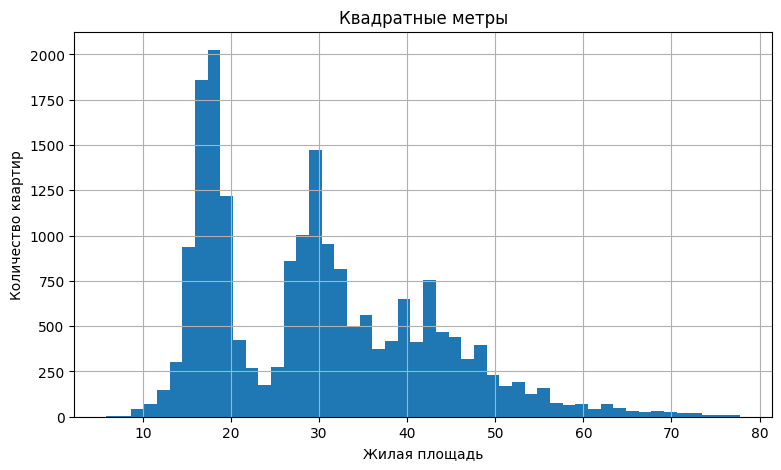

count    19568.000000
mean        29.929394
std         12.390644
min          5.835165
25%         18.100000
50%         29.000000
75%         38.782692
max         77.800000
Name: living_area, dtype: float64


In [75]:
analytics('living_area', 50)

**Вывод:** Жилая площадь квартир варьируется от 6 до 78 квадратных метров. В целом тенденции схожие с общей площадью квартир. Основную массу составляют объявления о продаже квартир жилой площадью от 15 до 50 квадратных метров.
Пиковые значения  на уровне 18, 30 и 44 квадратных метров также обуславливаются жилой площадью 1,2,3 - комнатных квартир типовой застройки.
Среднее значение показателя - 30 кв. метров, медианное – 29.


##### Площадь кухни

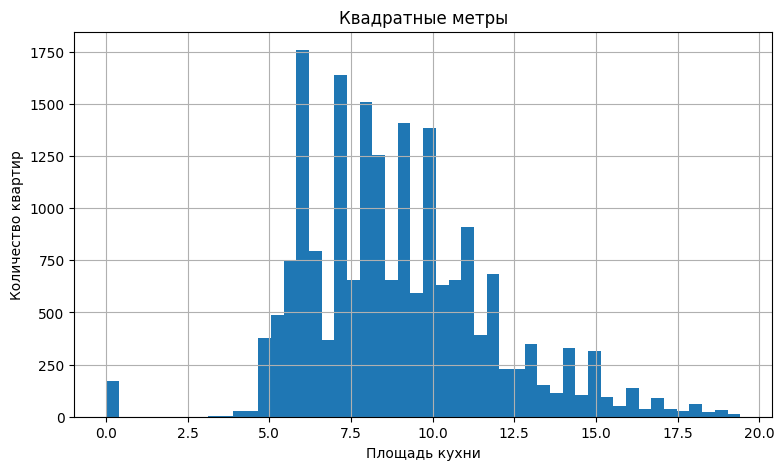

count    19568.000000
mean         8.946912
std          2.876020
min          0.000000
25%          7.000000
50%          8.500000
75%         10.591304
max         19.420000
Name: kitchen_area, dtype: float64


In [76]:
analytics('kitchen_area')

**Вывод**: Площадь кухни, в отличие от жилой площади слабо зависит от общей площади квартиры. Из общей массы выделяются квартиры-студии, в которых площадь кухни не выделяется. У квартир, с выделенной кухней площадь варьируется от 3 до 19,5 квадратных метров, при этом общую массу составляют квартиры с площадью от 4 до 12 квадратных метров. Пиковые значения на уровне 6,7,8,9 и 10 квадратных метров связаны с различными вариантами планировки квартиры. Среднее значение и медиана различаются не сильно, и составляют 8,94 и 8,5 квадратных метров соответственно.



##### Общая стоимость

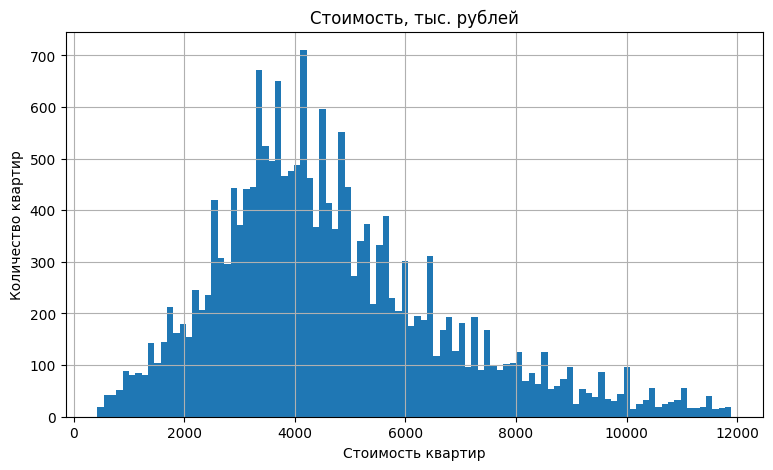

count    19568.000000
mean      4676.425079
std       2111.143683
min        430.000000
25%       3250.000000
50%       4300.000000
75%       5780.000000
max      11894.400000
Name: last_price, dtype: float64


In [77]:
analytics('last_price', 100)

**Вывод**: Стоимость квартир в представленной выборке варьируется от 400 тыс до 11,9 млн рублей. Основной ценовой сегмент составляют квартиры в диапазоне от 1 до 9 млн рублей, наиболее востребованными на рынке являются квартиры стоимостью от 3 до 5 млн рублей. Среднее значение показателя – 4676,4 тысячи рублей, медианное –4300,0 тысячи рублей.

##### Количество комнат

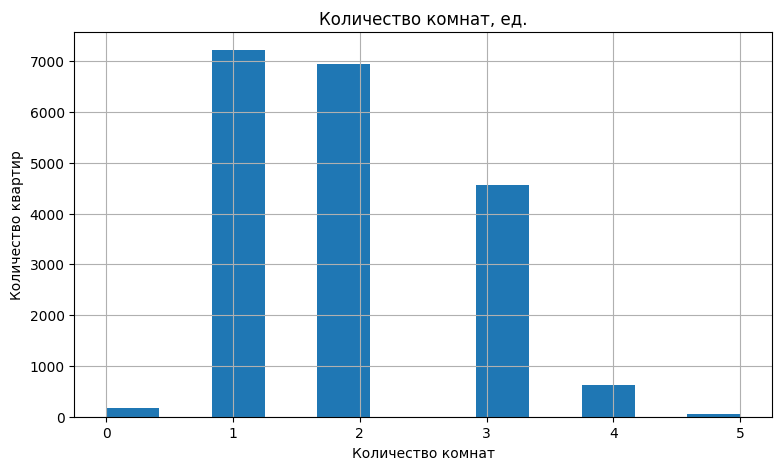

count    19568.000000
mean         1.916854
std          0.882408
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


In [78]:
analytics('rooms',12)

**Вывод:** Наиболее востребованы на рынке недвижимости одно- и двухкомнатные квартиры (около 7000 тыс. объявлений для каждой из групп), менее востребованные - трехкомнатные(более 4500 тыс. объявлений). Данные группы и составляют основную массу квартир в выборе. Четырехкомнатные квартиры представлены на рынке гораздо реже(чуть более 600 объявлений). Пятикомнатные квартиры и квартиры-студии(0 комнат) встречаются крайне редко. Среднее значение показателя – 1,91 комнат, медианное – 2 комнаты.

##### Высота потолков

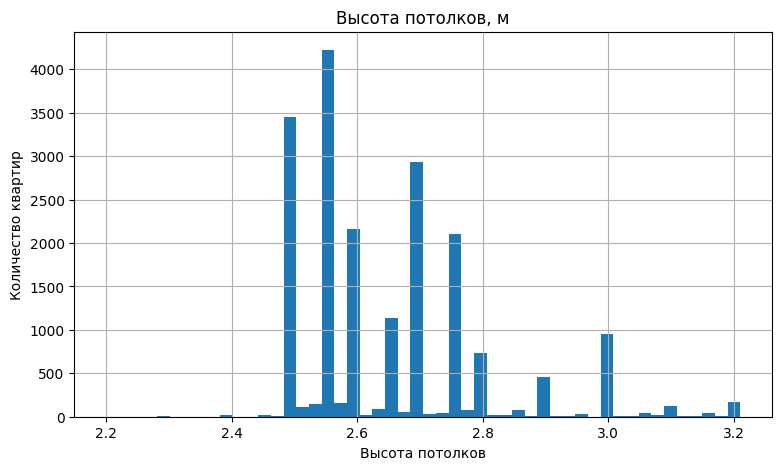

count    19568.000000
mean         2.654317
std          0.150259
min          2.200000
25%          2.550000
50%          2.600000
75%          2.750000
max          3.210000
Name: ceiling_height, dtype: float64


In [79]:
analytics('ceiling_height')

**Вывод:** Высота потолков в квартирах из представленной выборки варьируется от 2,2 до 3,2 метра. Основную массу составляют квартиры с высотой потолков от 2,5 до 2,75 метра. Пиковые значения на уровне 2,5, 2,55, 2,7, 2,75 метра объясняются высотой потолков в различных вариантах типовой застройки. Среднее значение показателя – 2,65 метра, медианное – 2,6 метра.
    

##### Этаж

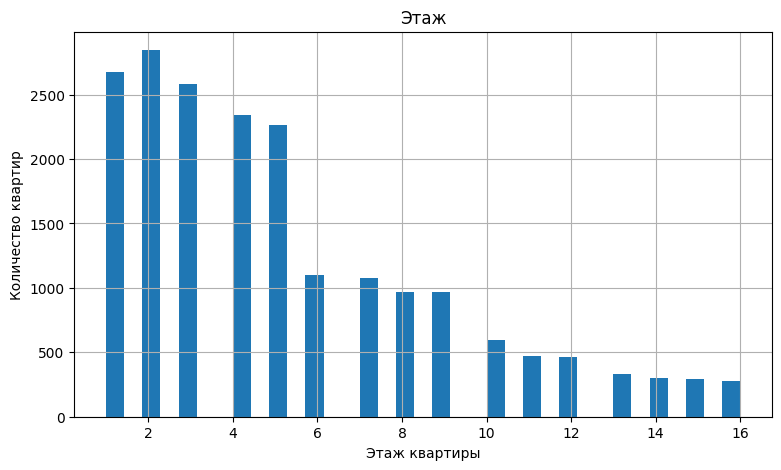

count    19568.000000
mean         5.189749
std          3.740540
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         16.000000
Name: floor, dtype: float64


In [80]:
analytics('floor', 35)

**Вывод:** Основную массу составляют объявления о продаже квартир, находящихся на 1-5 этажах. Это обусловлено в первую очередь большим количеством квартир, находящихся на нижних этажах. В целом также наблюдается тенденция на уменьшение количества объявлений о продаже квартир с увеличением этажа их расположения. Среднее значение этажа квартиры – 5,2, медианное – 4 этаж.

##### Тип этажа квартиры

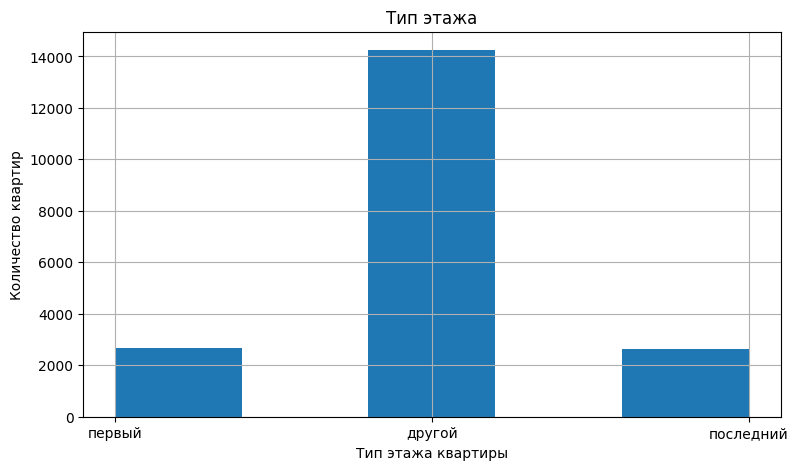

In [81]:
analytics('cat_floor', 5, describe = False)

**Вывод:** Основную массу составляют объявления о продаже квартир, не находящихся на первом и последнем этажах дома.  
Это обуславливается двумя факторами:  
1. Квартиры, расположенные на первом и последнем этажах, пользуются у населения меньшим спросом по ряду причин.
2. Квартир, относящихся к "другому" типу этажа в принципе больше, так как застройка в городах в основном многоэтажная, и промежуточных этажей в сумме больше, чем крайних.

##### Общее количество этажей в доме

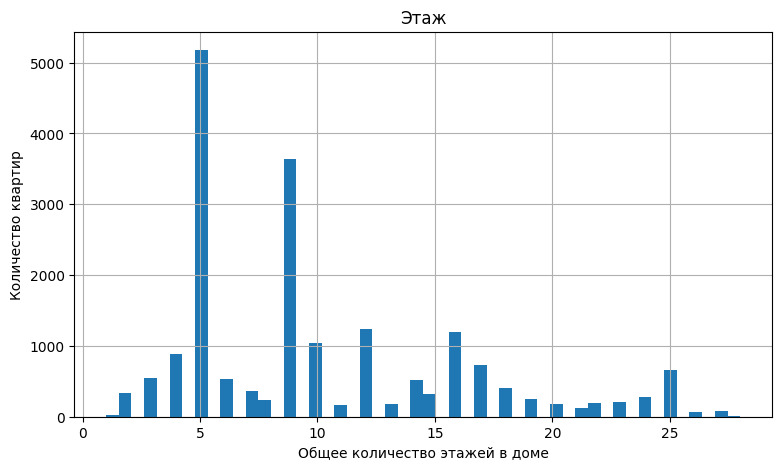

count    19568.000000
mean        10.198334
std          6.049181
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: floors_total, dtype: float64


In [82]:
analytics('floors_total')

**Вывод:** Обращает внимание большое количество объявлений о продаже квартир в 5 и 9-этажных домах. Это обусловлено большой распространенностью таких домов не только в данной локации, но и по всей России в целом. Это так называемые дома типовой застройки.
В целом значения на графике можно сопоставить с распространенностью этажной застройки в России. Среднее значение показателя – 10.2 этажа, медианное – 9 этажей.

##### Расстояние до центра города

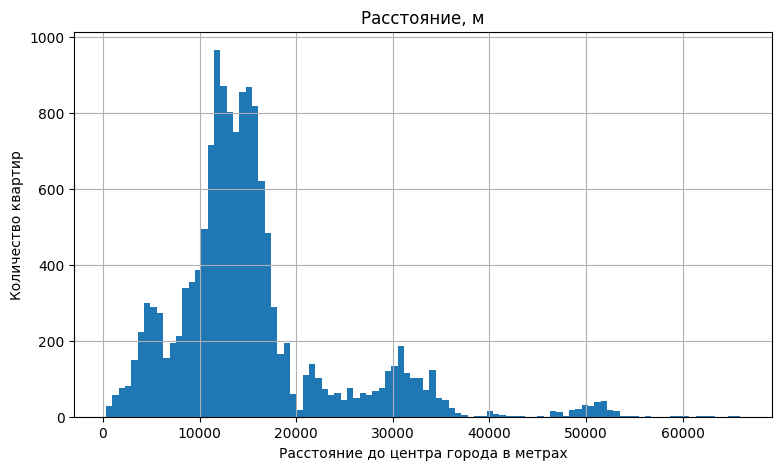

count    14432.000000
mean     15243.232885
std       8597.080277
min        329.000000
25%      10841.000000
50%      13689.000000
75%      16697.250000
max      65968.000000
Name: city_centers_nearest, dtype: float64


In [83]:
analytics('city_centers_nearest',100)

**Вывод:** В целом в  выборке представлены квартиры расположенные в радиусе 66 км от центра Санкт-Петербурга. 
Основную массу составляют квартиры в радиусе до 20 км, что позволяет предположить, что это квартиры, находящиеся в черте города. При этом большинство представленных квартир расположены в радиусе 10-18 км. Квартир, расположенных ближе к центру сравнительно меньше. Это может быть обусловлено градостроительными нормами, согласно которым центр города в большинстве своем представлен административными зданиями, а жилая застройка сосредоточена в спальных районах. 
Далее 20 км - квартиры, расположенные в прочих населенных пунктах.
В целом наблюдается четкая тенденция к уменьшению количества квартир с увеличением расстояния до центра города. Среднее значение показателя – 15243.2 метра, медианное – 13689.0 метра.

##### Расстояние до ближайшего аэропорта

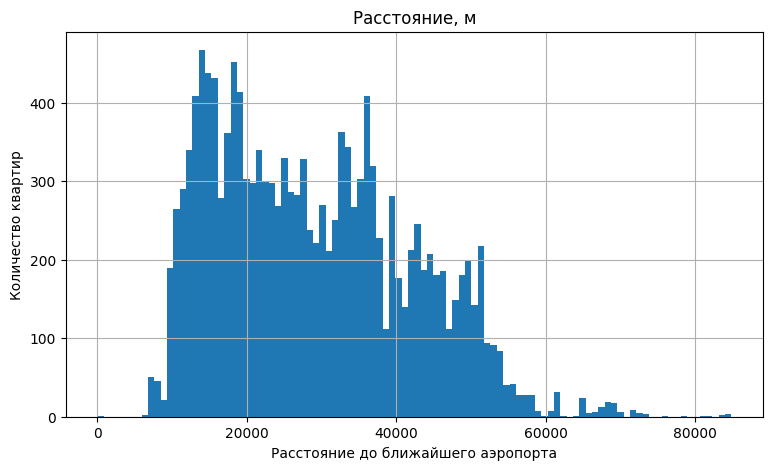

count    14421.000000
mean     28913.528327
std      13013.184571
min          0.000000
25%      17841.000000
50%      27314.000000
75%      37715.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [84]:
analytics('airports_nearest',100)

**Вывод:** В целом в выборке представлены квартиры расположенные в радиусе 85 км от от аэропорта. 
Основную массу составляют квартиры в радиусе от 10 до 55 км, что также позволяет предположить, что это квартиры, находящиеся в черте города(расстояние от цетра Санк-Петербурга до аэропорта 15 км), а также в ближайшем пригороде.
Квартир, расположенных ближе 10 км от аэропорта сравнительно не много, что обуславливается ограничениями на жилую застройку возле аэропортов. 
При этом присутствует квартира, находящаяся на территории аэропорта, что скорее всего является аномальным значением.
Среднее значение показателя – 28913.5 метра, медианное – 27314.0 метра.

##### Расстояние до ближайшего парка

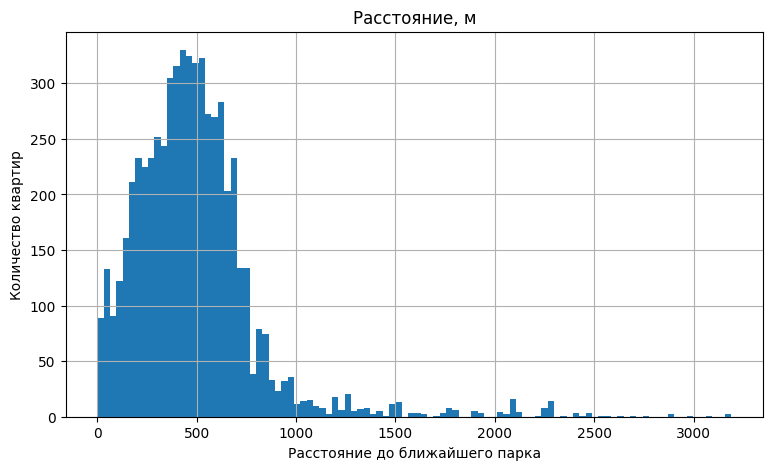

count    6013.000000
mean      487.752204
std       327.899367
min         1.000000
25%       289.000000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [85]:
analytics('parks_nearest',100)

**Вывод:** Квартир, в объявлении о которых указано расстояние до ближайшего парка сравнительно не много - менее 30 % от общего количества. Основную массу из таких квартир составляют квартиры, расположенные в радиусе 1 км. Квартир, расположенных далее крайне мало, что позволяет предположить, в объявлениях о продажах таких квартир автоматическое внесение информации о расстоянии до парков может работать некорректно.Среднее значение показателя –  847,8 метра, медианное – 456,0 метра.

##### День публикации объявления

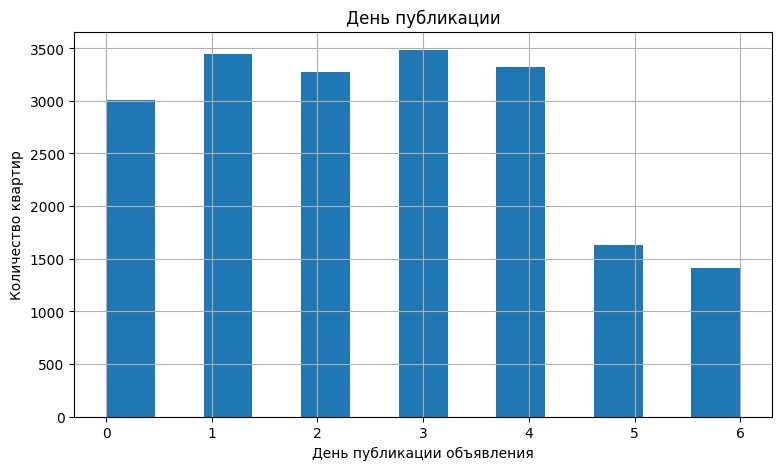

In [86]:
analytics('day_exp', 13, describe = False)

**Вывод:** Исследование дней публикации объявлений показывает, что в будние дни публикуется практически в 2 раза больше квартир, чем в выходные дни. Это может быть обусловлено тем, что публикацию осуществляют не только собственники, но и  агентства недвижимости, работающие по пятидневке. 

##### Месяц публикации объявления

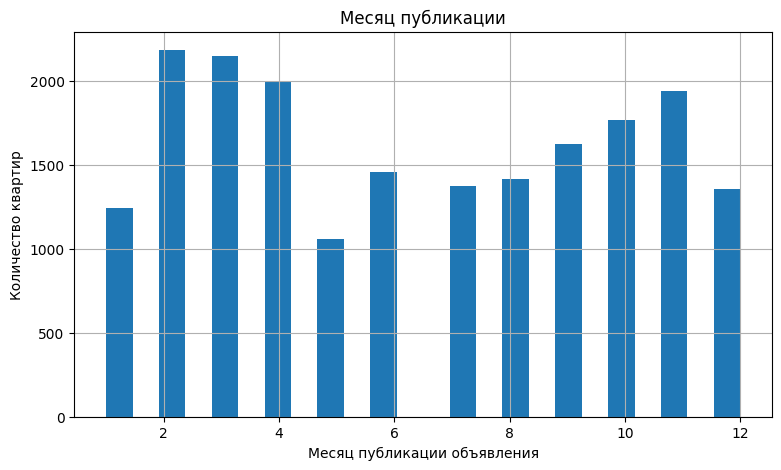

In [87]:
analytics('month_exp',24, describe = False)

**Вывод:** Исследование динамики публикации объявлений показывает следующее:
1. Наибольшее количество объявлений публикуется в период с февраля по апрель, чуть менее в осенние месяцы.
2. Меньшее количество объявлений в летние месяцы обусловлено преиодом отпусков.
3. Малое количество объявлений в январе и мае обусловлено большим количеством выходных и праздничных дней.

##### Общий вывод:
1. Общая площадь квартир в представленной  выборке варьируется от 12 до 114 квадратных метров. Основную массу составляют квартиры площадью от 30 до 80 квадратных метров.  Имеются пиковые значения показателя в районе 30,45 и 55 квадратных метров, вероятнее всего обусловленные площадью 1,2 и 3-комнатных квартир типовой застройки, а также общей долей таких квартир в выборке. Среднее значение показателя - 52 квадратных метра, медианное - 48,2.

2. Жилая площадь квартир варьируется от 6 до 78 квадратных метров. В целом тенденции схожие с общей площадью квартир. Основную массу составляют объявления о продаже квартир жилой площадью от 15 до 50 квадратных метров.
Пиковые значения  на уровне 18, 30 и 44 квадратных метров также обуславливаются жилой площадью 1,2,3 - комнатных квартир типовой застройки.
Среднее значение показателя - 30 кв. метров, медианное – 29.

3. Площадь кухни, в отличие от жилой площади слабо зависит от общей площади квартиры. Из общей массы выделяются квартиры-студии, в которых площадь кухни не выделяется. У квартир, с выделенной кухней площадь варьируется от 3 до 19,5 квадратных метров, при этом общую массу составляют квартиры с площадью от 4 до 12 квадратных метров. Пиковые значения на уровне 6,7,8,9 и 10 квадратных метров связаны с различными вариантами планировки квартиры. Среднее значение и медиана различаются не сильно, и составляют 8,94 и 8,5 квадратных метров соответственно.

4. Стоимость квартир в представленной выборке варьируется от 400 тыс. до 11,9 млн рублей. Основной ценовой сегмент составляют квартиры в диапазоне от 1 до 9 млн рублей, наиболее востребованными на рынке являются квартиры стоимостью от 3 до 5 млн рублей. Среднее значение показателя – 4676,4 тысячи рублей, медианное –4300,0 тысячи рублей.

5. Анализ количество комнат в квартирах показал, что наиболее востребованы на рынке недвижимости одно- и двухкомнатные квартиры (около 7000 тыс. объявлений для каждой из групп), менее востребованные - трехкомнатные(более 4500 тыс. объявлений). Данные группы и составляют основную массу квартир в выборе. Четырехкомнатные квартиры представлены на рынке гораздо реже(чуть более 600 объявлений). Пятикомнатные квартиры и квартиры-студии(0 комнат) встречаются крайне редко. Среднее значение показателя – 1,91 комнат, медианное – 2 комнаты.

6. Высота потолков в квартирах из представленной выборки варьируется от 2,2 до 3,2 метра. Основную массу составляют квартиры с высотой потолков от 2,5 до 2,75 метра. Пиковые значения на уровне 2,5, 2,55, 2,7, 2,75 метра объясняются высотой потолков в различных вариантах типовой застройки. Среднее значение показателя – 2,65 метра, медианное – 2,6 метра.

7. Основную массу составляют объявления о продаже квартир, находящихся на 1-5 этажах. Это обусловлено в первую очередь большим количеством квартир, находящихся на нижних этажах. В целом также наблюдается тенденция на уменьшение количества объявлений о продаже квартир с увеличением этажа их расположения. Среднее значение этажа квартиры – 5,2, медианное – 4 этаж.

8. Анализ типа этажа квартиры показал, что основную массу составляют объявления о продаже квартир, не находящихся на первом и последнем этажах дома. Что обуславливается меньшим спросом на квартиры, расположенные на первом и последнем, а также принципиально большим количество квартир, относящихся к "другому" типу этажа, так как застройка в городах в основном многоэтажная, и промежуточных этажей в сумме больше, чем крайних.

9. Анализ общей этажности домов показал большое количество объявлений о продаже квартир в 5 и 9-этажных домах. Это обусловлено большой  распространенностью таких домов не только в данной локации, но и по всей России в целом. Это так называемые дома типовой застройки. В целом значения на графике можно сопоставить с распространенностью этажной застройки в России. Среднее значение показателя – 10.2 этажа, медианное – 9 этажей.

10. Анализ расстояния квартир до центра города показал, что в целом в выборке представлены квартиры расположенные в радиусе 66 км от центра Санкт-Петербурга. Основную массу составляют квартиры в радиусе до 20 км, что позволяет предположить, что это квартиры, находящиеся в черте города. При этом большинство представленных квартир, расположено расположены в радиусе 10-18 км. Квартир, расположенных ближе к центру сравнительно меньше. Это может быть обусловлено градостроительными нормами, согласно которым центр города в большинстве своем представлен административными зданиями, а жилая застройка сосредоточена в спальных районах. Далее 20 км - квартиры, расположенные в прочих населенных пунктах. В целом наблюдается четкая тенденция к уменьшению количества квартир с увеличением расстояния до центра города. Среднее значение показателя – 15243.2 метра, медианное – 13689.0 метра.

11. Анализ расстояния квартир от аэропорта показал, что в целом в выборке представлены квартиры расположенные в радиусе 85 км от аэропорта. Основную массу составляют квартиры в радиусе от 10 до 55 км, что также позволяет предположить, что это квартиры, находящиеся в черте города (расстояние от центра Санкт-Петербурга до аэропорта 15 км), а также в ближайшем пригороде. Квартир, расположенных ближе 10 км от аэропорта сравнительно не много, что обуславливается ограничениями на жилую застройку возле аэропортов. При этом присутствует квартира, находящаяся на территории аэропорта, что скорее всего является аномальным значением. Среднее значение показателя – 28913.5 метра, медианное – 27314.0 метра.

12. Квартир, в объявлении о которых указано расстояние до ближайшего парка сравнительно не много - менее 30 % от общего количества. Основную массу из таких квартир составляют квартиры, расположенные в радиусе 1 км. Квартир, расположенных далее крайне мало, что позволяет предположить, в объявлениях о продажах таких квартир автоматическое внесение информации о расстоянии до парков может работать некорректно. Среднее значение показателя –  847,8 метра, медианное – 456,0 метра.

13. Исследование дней публикации объявлений показывает, что в будние дни публикуется практически в 2 раза больше квартир, чем в выходные дни. Это может быть обусловлено тем, что публикацию осуществляют не только собственники, но и агентства недвижимости, работающие по пятидневке.

14. Исследование динамики публикации объявлений по месяцам показывает, что наибольшее количество объявлений публикуется в период с февраля по апрель, чуть менее в осенние месяцы. Меньшее количество объявлений в летние месяцы обусловлено периодом отпусков, малое количество объявлений в январе и мае обусловлено большим количеством выходных и праздничных дней.



#### Изучение скорости продажи квартир

Рассмотрим гисторгамму столбца а также описательную статистику.

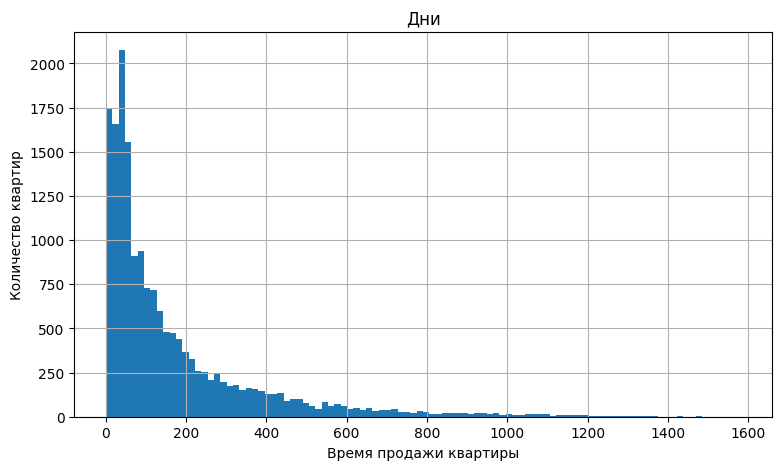

count    17179.000000
mean       171.026253
std        209.438451
min          1.000000
25%         43.000000
50%         90.000000
75%        216.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [88]:
analytics('days_exposition', 100)

Для более подробного изучения рассмотрим гистограммы по диапазонам значений.

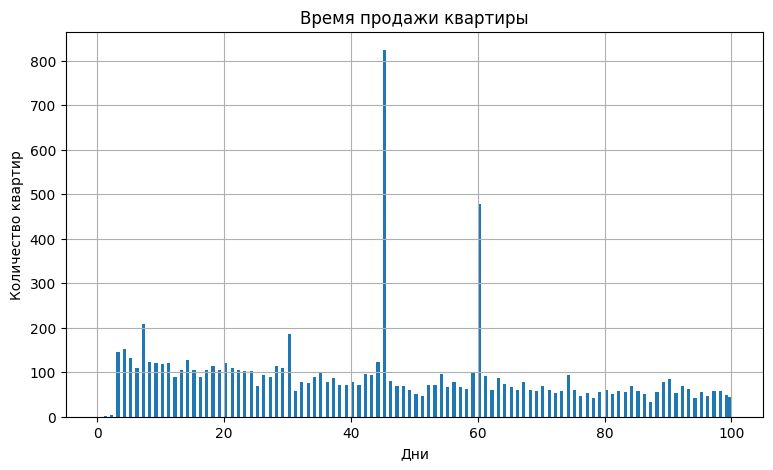

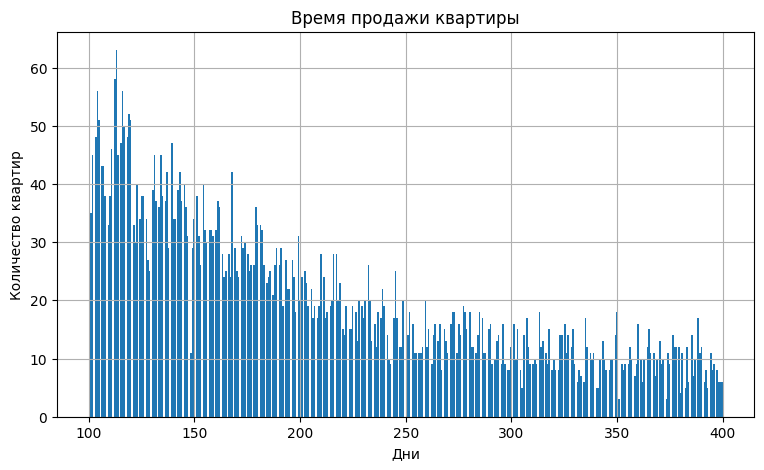

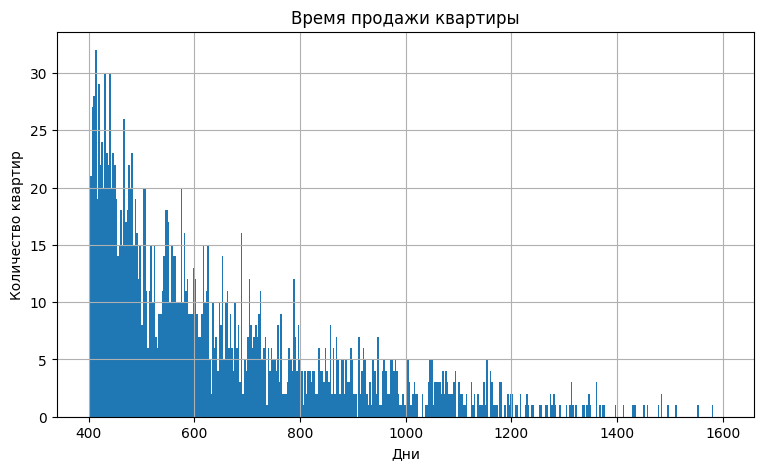

In [89]:
data['days_exposition'].hist(bins=200, range = (0,100), figsize = (9,5)) #Значения заглушки в графики не попали, так как аномально велики
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data['days_exposition'].hist(bins=400, range = (100,400), figsize = (9,5))
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data['days_exposition'].hist(bins=400, range = (400,1600), figsize = (9,5))
plt.title('Время продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Исследование значений сроков размещения публикаций объявлений показывает следующее:
1. Среднее значение значение срока публикаций составляет 171 день, медиана - 90 дней. Такая разница обусловлена большим количеством объявлений с сроком публикации более 2 лет и их влиянием на среднее значение.
2. При определении среднего срока продажи квартиры считаю правильнее руководствоваться медианным значением - 90 дней.
3. Быстрой продажей предлагаю считать значения, находящиеся в 1 квартиле - проданные в течение 40 дней, необычно долгими - значения из 4 квартиля, продажи квартир по прошествии 216 и более дней.
4. Обращает на себя пиковые значения на 45 и 60 дни. Проанализировав информацию на сайте Яндекс-Недвижимости обнаружил, что 45 и 60 дней - предельные сроки размещения бесплатных объявлений  о продаже недвижимости стоимостью до 4,5 млн и 10 млн рублей соответственно. Данные пики являются не продажей, а принудительным снятием с публикации бесплатных объявлений(однако данные условия на текущий момент не распространяются на Москву, Санкт-Петербург и их области, что не соотносится с нашим дата-фреймом, но есть вероятность, что эти условия распространялись на них ранее). 

#### Изучение факторов влияющих на общую (полную) стоимость объекта

##### Влияние общей площади на  (полную) стоимость объекта

Сформируем сводную таблицу, построим диаграмму рассеивания, а также уточним коэффициент корреляции между двумя переменными.

In [90]:
data_total = data.pivot_table(index = 'total_area', values = 'last_price').reset_index()

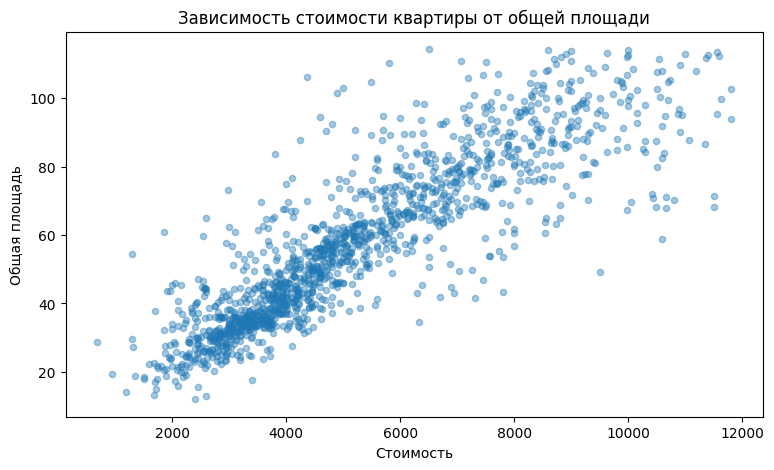

In [91]:
data_total.plot(x='last_price', y='total_area', kind='scatter', alpha=0.4,  figsize = (9,5))
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Стоимость')
plt.ylabel('Общая площадь')
plt.show()

In [92]:
data_total.corr()

,total_area,last_price
total_area,1.000000,0.873186
last_price,0.873186,1.000000


**Вывод:** Между двумя параметрами отслеживается  достаточно сильная прямая корреляция.
Это вполне логично, так как стоимость квартиры (в том числе кадастровая) напрямую зависит от общей площади.

##### Влияние жилой площади на  (полную) стоимость объекта

Сформируем сводную таблицу, построим диаграмму рассеивания, а также уточним коэффициент корреляции между двумя переменными.

In [93]:
data_living= data.pivot_table(index = 'living_area', values = 'last_price').reset_index()

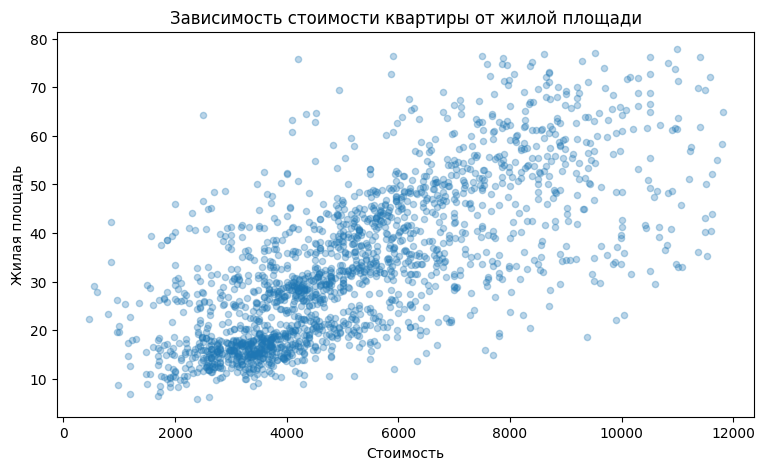

In [94]:
data_living.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize = (9,5))
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.xlabel('Стоимость')
plt.ylabel('Жилая площадь')
plt.show()

In [95]:
data_living.corr()

,living_area,last_price
living_area,1.000000,0.718364
last_price,0.718364,1.000000


**Вывод:** Корелляция между стоимостью квартиры и жилой площадью также отслеживается, но слабее чем корреляция с общей площадью.

##### Влияние площади кухни на (полную) стоимость объекта

Сформируем сводную таблицу, построим диаграмму рассеивания, а также уточним коэффициент корреляции между двумя переменными.

In [96]:
data_kitchen = data.pivot_table(index = 'kitchen_area', values = 'last_price').reset_index()

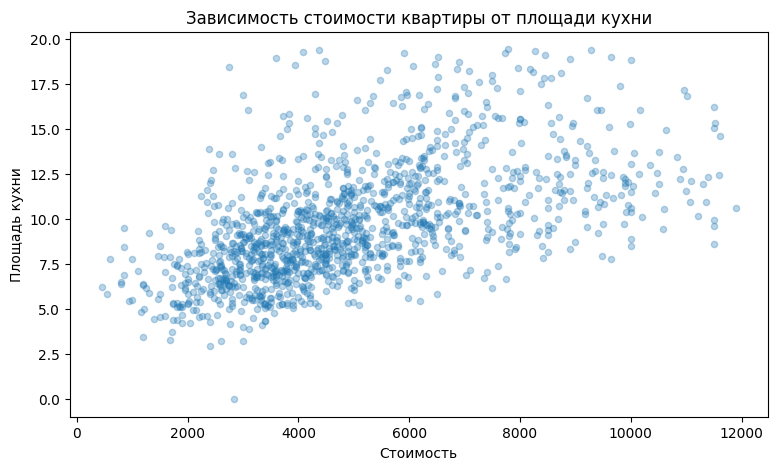

In [97]:
data_kitchen.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize = (9,5))
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.xlabel('Стоимость')
plt.ylabel('Площадь кухни')
plt.show()

In [98]:
data_kitchen.corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.557895
last_price,0.557895,1.000000


**Вывод:** Корелляция между площадью кухни также отслеживается, но в целом слабее корелляции относительно общей и жилой площадей.

##### Влияние количества комнат (полную) стоимость объекта

Сформируем сводную таблицу, построим диаграмму, а также уточним коэффициент корреляции между двумя переменными.

In [99]:
data_rooms = data.pivot_table(index = 'rooms', values = 'last_price').reset_index()

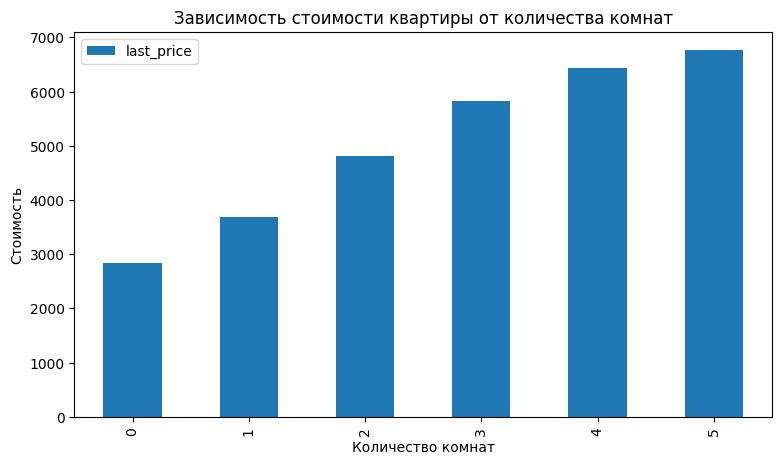

In [100]:
data_rooms.plot(y='last_price', x='rooms', kind='bar', figsize = (9,5))
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()

In [101]:
data_rooms.corr()

,rooms,last_price
rooms,1.00000,0.98567
last_price,0.98567,1.00000


**Вывод:** Между параметрами сильная прямая корелляция. Увеличение числа комнат в квартире прямо сказывается на увеличении стоимости объекта недвижимости.

##### Влияние типа этажа на  (полную) стоимость объекта

Сформируем сводную таблицу и построим диаграмму.

In [102]:
data_floor = data.pivot_table(index = 'cat_floor', values = 'last_price').reset_index()

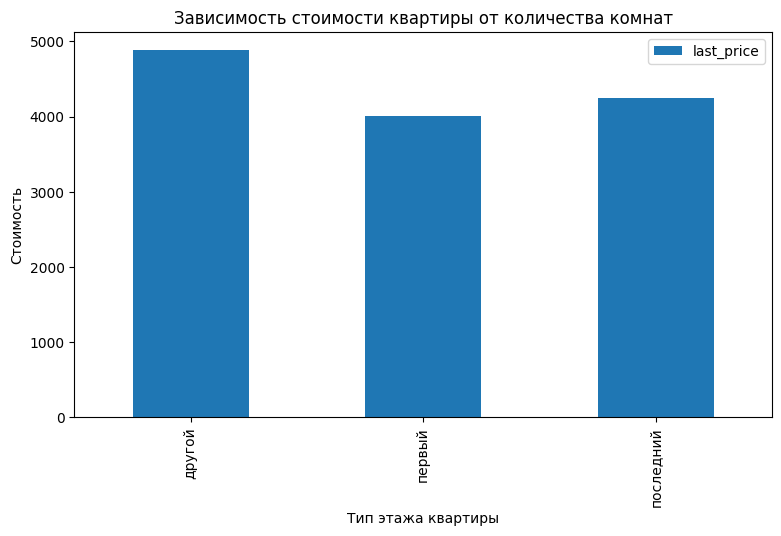

In [103]:
data_floor.plot(y='last_price', x='cat_floor', kind='bar', figsize = (9,5))
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Стоимость')
plt.show()

**Вывод:** Квартиры на первом и последнем этажах зданий сравнительно дешевле, чем квартиры, расположенные на промежуточных этажах. Это связано с тем, что по ряду причин, данные квартиры пользуются меньшим спросом.

##### Влияние дня размещения объявления на  (полную) стоимость объекта

Сформируем сводную таблицу и построим диаграмму.

In [104]:
data_day = data.pivot_table(index = 'day_exp', values = 'last_price').reset_index()

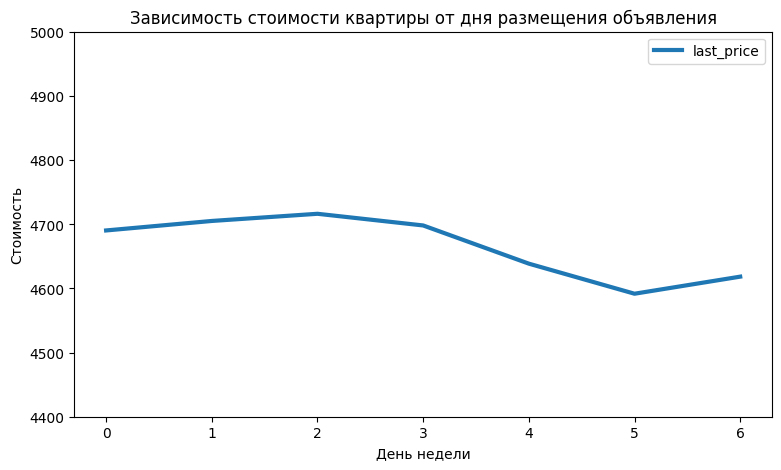

In [105]:
data_day.plot(y='last_price', x='day_exp',  linewidth=3, figsize = (9,5),  ylim = (4400,5000))
plt.title('Зависимость стоимости квартиры от дня размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.show()

**Вывод:** Отчетливых тенденций между днем размещения объявлений и стоимостью квартир не выявлено. Имеются незначительные перепады, не позволяющие сделать конкретных выводов.

##### Влияние месяца размещения объявления на  (полную) стоимость объекта

Сформируем сводную таблицу и построим диаграмму.

In [106]:
data_month = data.pivot_table(index = 'month_exp', values = 'last_price').reset_index()

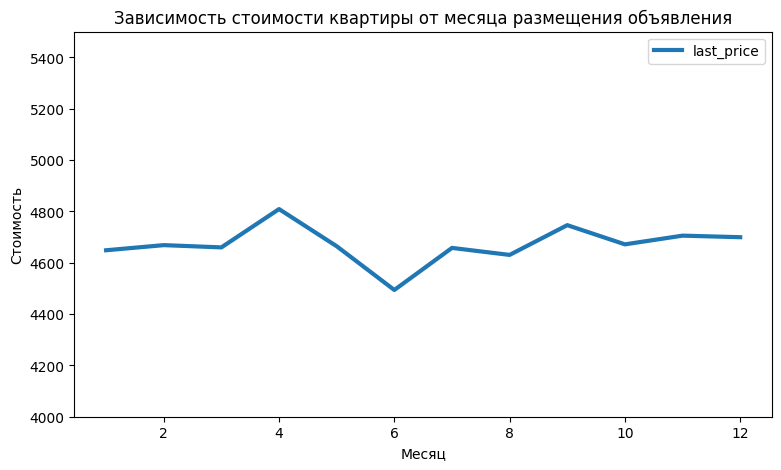

In [107]:
data_month.plot(y='last_price', x='month_exp', linewidth=3, figsize = (9,5), ylim = (4000,5500))
plt.title('Зависимость стоимости квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

Зависимость между месяцем размещения объявления и стоимостью жилья также слабая. Имеются небольшие перепады, связанные с особенностями сезонного спроса.

##### Влияние года размещения объявления на  (полную) стоимость объекта 

Влияние года размещения объявления на стоимость квартиры показывает динамику изменения данного показателя во времени. Так как на среднюю стоимость жилья по годам могут оказывать влияние как инфляция, так и изменение средней площади продаваемых квартир а также среднее количество комнат в них, то принято решение рассмотреть динамику этих показателей в комплексе.
Для этого сформируем сводную таблицу и строим соответствующие графики.


In [108]:
data_year = data.pivot_table(index = 'year_exp', values = ['last_price','total_area', 'rooms']).reset_index()

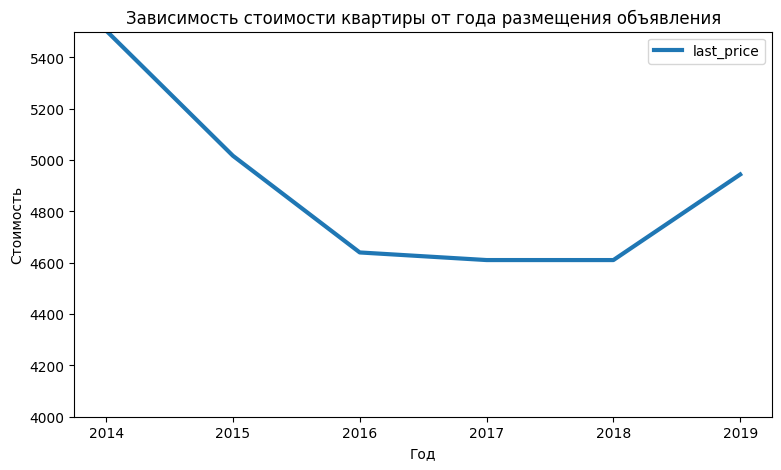

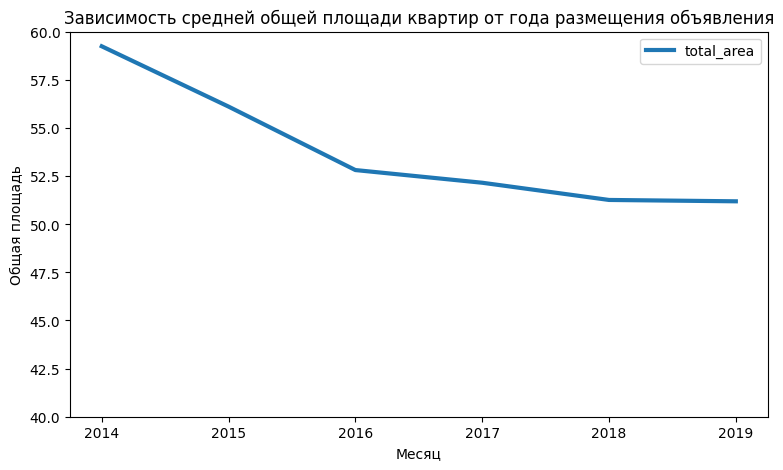

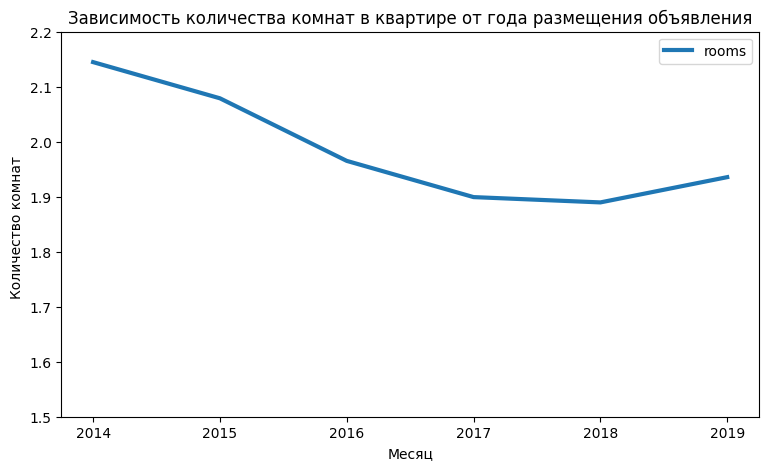

In [109]:
data_year.plot(y='last_price', x='year_exp', linewidth=3, figsize = (9,5), ylim = (4000,5500))
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()
data_year.plot(y='total_area', x='year_exp', linewidth=3, figsize = (9,5), ylim = (40,60))
plt.title('Зависимость средней общей площади квартир от года размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Общая площадь')
plt.show()
data_year.plot(y='rooms', x='year_exp', linewidth=3, figsize = (9,5), ylim = (1.5,2.2))
plt.title('Зависимость количества комнат в квартире от года размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество комнат ')
plt.show()

**Вывод** В период с 2014 по 2018 год наблюдается общая тенденция как к снижению стоимости жилья представленного на рынке, так и к снижению ее площади и количества комнат. В 19 же году  средняя стоимость жилья и среднее количество комнат в них незначительно выросли по отношению к уровню 2018 года, средняя общая площадь квартир в целом незначительно уменьшилась. 

##### Общий вывод:
Изучение зависимости стоимости жилья от различных факторов показало следующее:
1. Наибольшую корреляцию с стоимостью жилья показали общая площадь квартиры и количество комнат в ней. Что вполне логично так как эти параметры сильно коррелируют между собой и напрямую влияют на стоимость квартир.
2.Меньшая корреляция стоимости жилья с жилой площадью и площадью кухни обусловлена тем, что в зависимости от планировки, квартиры с одинаковой общей площадью могут иметь различное соотношение жилой и нежилой площадей. Данные соотношения сглаживают коэффициент корреляции.
3. четливых тенденций между днем размещения объявлений и стоимостью квартир не выявлено. Имеются незначительные перепады, не позволяющие сделать конкретных выводов.
4. висимость между месяцем размещения объявления и стоимостью жилья также слабая. Имеются небольшие перепады, связанные с особенностями сезонного спроса.
5. Незначительную отрицательную корреляцию между годом опубликования объявлений и стоимостью, я бы рассматривал в совокупности с уменьшением средней площади продаваемых квартир и среднего количества комнат в них. Кроме того отрицательную корреляцию могут сглаживать инфляционные явления в экономике. Более подробные результаты даст анализ в сопоставимых ценах, с учетом индексов-дефляторов.


#### Определение средних цен одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [110]:
data_local = data.groupby('locality_name').agg({'total_images': 'count', 'last_price':'mean', 'total_area': "mean"}).reset_index()
data_local ['sm_prise'] = data_local ['last_price'] / data_local ['total_area']
data_local  = data_local .sort_values('total_images', ascending = False).reset_index().loc[0:10, ['locality_name', 'sm_prise']]

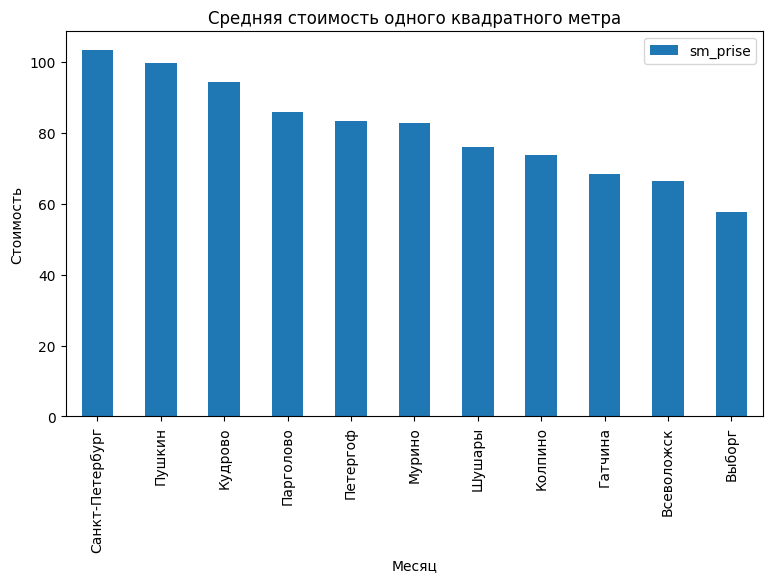

In [111]:
data_local = data_local.sort_values('sm_prise', ascending = False).reset_index(drop = True)
data_local.plot(y='sm_prise', x='locality_name', kind='bar', figsize = (9,5))
plt.title('Средняя стоимость одного квадратного метра')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

In [112]:
data_local

,locality_name,sm_prise
0,Санкт-Петербург,103.346417
1,Пушкин,99.707779
2,Кудрово,94.221921
3,Парголово,85.752970
4,Петергоф,83.220800
5,Мурино,82.763220
6,Шушары,75.902785
7,Колпино,73.707245
8,Гатчина,68.385471
9,Всеволожск,66.402195


**Вывод:** Из 10 населенных пунктов с наибольшей активностью клиентов на рынке недвижимости наибольшая стоимость квадратного метра жилья отслеживается в Санкт-Петербурге 103,3 тысячи рублей за квадратный метр, что вполне логично, так как это крупный мегаполис, город федерального значения.  
Наименьшая стоимость в Выборге - 57,6 тысячи рублей за квадратный метр.
    

####  Определение средней цены каждого километра

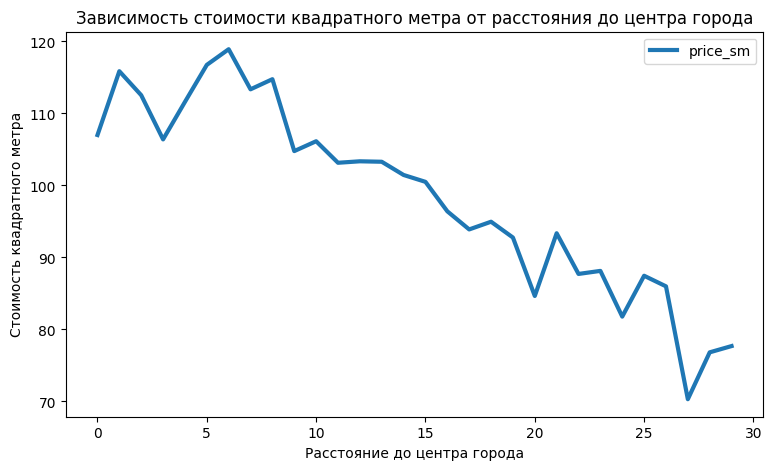

In [113]:
data_sm = (data[(data['locality_name'] == 'Санкт-Петербург')&(data['city_centers_nearest_km'] != 556)] #отфильтровал заглушки
           .pivot_table(index = 'city_centers_nearest_km', values = ['last_price','total_area']).reset_index())
data_sm['price_sm'] = data_sm['last_price'] / data_sm['total_area']
data_sm = data_sm[['city_centers_nearest_km','price_sm']]
data_sm.plot(y='price_sm', x= 'city_centers_nearest_km', linewidth=3, figsize = (9,5))
plt.title('Зависимость стоимости квадратного метра от расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Стоимость квадратного метра')
plt.show()

In [114]:
data_sm['city_centers_nearest_km'].corr(data_sm['price_sm'])

-0.9341664408763464

**Вывод:** В целом между стоимостью квадратного метра жилья и расстоянием до центра города отслеживается сильная отрицательная корреляция, явная тенденция на уменьшение стоимости квадратного метра жилья при увеличении расстояния от центра Санкт-Петербурга.  Незначительные перепады могут быть обусловлены большей популярностью отдельных районов города, а следовательно большим спросом на квартиры в них и сравнительно высокой стоимостью.

### Общий вывод

Целью исследования было проведение исследовательского анализа данных сервиса Яндекс.Недвижимость (архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет).   
По каждой квартире в выборке были доступны два вида данных: внесенные пользователями и полученные автоматически на основе картографических данных.   
В ходе изучения общей информации о датафрейме было выявлено, что он состоит  из 22 столбцов и 23699 строк.   
В большинстве столбцов имелись пропущенные значения, в некоторых указан некорректный тип данных. По ряду признаков присутствовали аномальные и выбивающиеся значения.  
Было принято решение провести предобработку данных, в рамках которой каждый столбец проанализирован и проработан индивидуально.  
В большей части столбцов произведена замена аномальных и пропущенных значений на групповые медианные, удалены аномальные значения, не поддающиеся корректировке. По необходимости произведена корректировка типов данных в столбцах.  
Кроме того, было принято решение, удалить выбросы.    
В столбцах с картографической информацией, а также с количеством дней публикации объявления, ввиду невозможности подбора корректного значения, и необходимости в корректировке типа данных а также сохранения необходимых данных, замена пропусков была  произведена на условное значение, которое в последствии не учитывалось при проведении аналитических мероприятий.  
В целом по итогам предобработки удалено  17,4%  строк от исходного датафрейма.  

После предобработки в датафрейм были добавлены Столбцы, необходимые для дальнейшего проведения аналитических мероприятий:
* цена одного квадратного метра;
* день недели публикации объявления;
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах.

Этап исследовательского анализа данных показал следующие результаты:
1. Исследование общих параметров опубликованных объявлений:
* Общая площадь квартир в представленной выборке варьируется от 12 до 114 квадратных метров. Основную массу составляют квартиры площадью от 30 до 80 квадратных метров.  Имеются пиковые значения показателя в районе 30,45 и 55 квадратных метров, вероятнее всего обусловленные площадью 1,2 и 3-комнатных квартир типовой застройки, а также общей долей таких квартир в выборке. Среднее значение показателя - 52 квадратных метра, медианное - 48,2.

* Жилая площадь квартир варьируется от 6 до 78 квадратных метров. В целом тенденции схожие с общей площадью квартир. Основную массу составляют объявления о продаже квартир жилой площадью от 15 до 50 квадратных метров. Пиковые значения  на уровне 18, 30 и 44 квадратных метров также обуславливаются жилой площадью 1,2,3 - комнатных квартир типовой застройки. Среднее значение показателя - 30 кв. метров, медианное – 29.

* Площадь кухни, в отличие от жилой площади слабо зависит от общей площади квартиры. Из общей массы выделяются квартиры-студии, в которых площадь кухни не выделяется. У квартир, с выделенной кухней площадь варьируется от 3 до 19,5 квадратных метров, при этом общую массу составляют квартиры с площадью от 4 до 12 квадратных метров. Пиковые значения на уровне 6,7,8,9 и 10 квадратных метров связаны с различными вариантами планировки квартиры. Среднее значение и медиана различаются не сильно, и составляют 8,94 и 8,5 квадратных метров соответственно.

* Стоимость квартир в представленной выборке варьируется от 400 тыс до 11,9 млн рублей. Основной ценовой сегмент составляют квартиры в диапазоне от 1 до 9 млн рублей, наиболее востребованными на рынке являются квартиры стоимостью от 3 до 5 млн рублей. Среднее значение показателя – 4676,4 тысячи рублей, медианное –4300,0 тысячи рублей.

* Анализ количество комнат в квартирах показал, что наиболее востребованы на рынке недвижимости одно- и двухкомнатные квартиры (около 7000 тыс. объявлений для каждой из групп), менее востребованные - трехкомнатные(более 4500 тыс. объявлений). Данные группы и составляют основную массу квартир в выборе. Четырехкомнатные квартиры представлены на рынке гораздо реже(чуть более 600 объявлений). Пятикомнатные квартиры и квартиры-студии(0 комнат) встречаются крайне редко. Среднее значение показателя – 1,91 комнат, медианное – 2 комнаты.

* Высота потолков в квартирах из представленной выборки варьируется от 2,2 до 3,2 метра. Основную массу составляют квартиры с высотой потолков от 2,5 до 2,75 метра. Пиковые значения на уровне 2,5, 2,55, 2,7, 2,75 метра объясняются высотой потолков в различных вариантах типовой застройки. Среднее значение показателя – 2,65 метра, медианное – 2,6 метра.

* Основную массу составляют объявления о продаже квартир, находящихся на 1-5 этажах. Это обусловлено в первую очередь большим количеством квартир, находящихся на нижних этажах. В целом также наблюдается тенденция на уменьшение количества объявлений о продаже квартир с увеличением этажа их расположения. Среднее значение этажа квартиры – 5,2, медианное – 4 этаж.

* Анализ типа этажа квартиры показал, что основную массу составляют объявления о продаже квартир, не находящихся на первом и последнем этажах дома. Что обуславливается меньшим спросом на квартиры, расположенные на первом и последнем, а также принципиально большим количество квартир, относящихся к "другому" типу этажа, так как застройка в городах в основном многоэтажная, и промежуточных этажей в сумме больше, чем крайних.
* Анализ общей этажности домов показал большое количество объявлений о продаже квартир в 5 и 9-этажных домах. Это обусловлено большой  распространенностью таких домов не только в данной локации, но и по всей России в целом. Это так называемые дома типовой застройки. В целом значения на графике можно сопоставить с распространенностью этажной застройки в России. Среднее значение показателя – 10.2 этажа, медианное – 9 этажей.

* Анализ расстояния квартир до центра города показал, что в целом в выборке представлены квартиры расположенные в радиусе 66 км от центра Санкт-Петербурга. Основную массу составляют квартиры в радиусе до 20 км, что позволяет предположить, что это квартиры, находящиеся в черте города. При этом большинство представленных квартир, расположено расположены в радиусе 10-18 км. Квартир, расположенных ближе к центру сравнительно меньше. Это может быть обусловлено градостроительными нормами, согласно которым центр города в большинстве своем представлен административными зданиями, а жилая застройка сосредоточена в спальных районах. Далее 20 км - квартиры, расположенные в прочих населенных пунктах. В целом наблюдается четкая тенденция к уменьшению количества квартир с увеличением расстояния до центра города. Среднее значение показателя – 15243.2 метра, медианное – 13689.0 метра.

* Анализ расстояния квартир от аэропорта показал, что в целом в выборке представлены квартиры расположенные в радиусе 85 км от аэропорта. Основную массу составляют квартиры в радиусе от 10 до 55 км, что также позволяет предположить, что это квартиры, находящиеся в черте города (расстояние от центра Санкт-Петербурга до аэропорта 15 км), а также в ближайшем пригороде. Квартир, расположенных ближе 10 км от аэропорта сравнительно не много, что обуславливается ограничениями на жилую застройку возле аэропортов. При этом присутствует квартира, находящаяся на территории аэропорта, что скорее всего является аномальным значением. Среднее значение показателя – 28913.5 метра, медианное – 27314.0 метра.

* Квартир, в объявлении о которых указано расстояние до ближайшего парка сравнительно не много - менее 30 % от общего количества. Основную массу из таких квартир составляют квартиры, расположенные в радиусе 1 км. Квартир, расположенных далее крайне мало, что позволяет предположить, в объявлениях о продажах таких квартир автоматическое внесение информации о расстоянии до парков может работать некорректно. Среднее значение показателя –  847,8 метра, медианное – 456,0 метра.

* Исследование дней публикации объявлений показывает, что в будние дни публикуется практически в 2 раза больше квартир, чем в выходные дни. Это может быть обусловлено тем, что публикацию осуществляют не только собственники, но и агентства недвижимости, работающие по пятидневке.

* Исследование динамики публикации объявлений по месяцам показывает , что наибольшее количество объявлений публикуется в период с февраля по апрель, чуть менее в осенние месяцы. Меньшее количество объявлений в летние месяцы обусловлено периодом отпусков, малое количество объявлений в январе и мае обусловлено большим количеством выходных и праздничных дней.

2. Исследование значений сроков размещения публикаций объявлений:
* Среднее значение срока публикаций составляет 171 день, медиана - 90 дней. Такая разница обусловлена большим количеством объявлений с сроком публикации более 2 лет и их влиянием на среднее значение.
* При определении среднего срока продажи квартиры корректнее руководствоваться медианным значением - 90 дней.
* Быстрой продажей считаются значения, находящиеся в 1 квартиле - проданные в течение 40 дней, необычно долгими - значения из 4 квартиля, продажи квартир по прошествии 216 и более дней.
* Обращают на себя пиковые значения на 45 и 60 дни. Проанализировав информацию на сайте Яндекс-Недвижимости обнаружил, что 45 и 60 дней - предельные сроки размещения бесплатных объявлений о продаже недвижимости стоимостью до 4,5 млн и 10 млн рублей соответственно. Данные пики являются не продажей, а принудительным снятием с публикации бесплатных объявлений(однако данные условия на текущий момент не распространяются на Москву, Санкт-Петербург и их области, что не соотносится с нашим дата-фреймом, но есть вероятность, что эти условия распространялись на них ранее). 


3. Изучение зависимости стоимости жилья от различных факторов показало следующее:
* Наибольшую корреляцию с стоимостью жилья показали общая площадь квартиры и количество комнат в ней. Что вполне логично так как эти параметры сильно коррелируют между собой и напрямую влияют на стоимость квартир.
* Меньшая корреляция стоимости жилья с жилой площадью и площадью кухни обусловлена тем, что в зависимости от планировки, квартиры с одинаковой общей площадью могут иметь различное соотношение жилой и нежилой площадей. Данные соотношения сглаживают коэффициент корреляции.
* Отчетливых тенденций между днем размещения объявлений и стоимостью квартир не выявлено. Имеются незначительные перепады, не позволяющие сделать конкретных выводов.
* Зависимость между месяцем размещения объявления и стоимостью жилья также слабая. Имеются небольшие перепады, связанные с особенностями сезонного спроса.
* Незначительную отрицательную корреляцию между годом опубликования объявлений и стоимостью, я бы рассматривал в совокупности с уменьшением средней площади продаваемых квартир и среднего количества комнат в них. Кроме того отрицательную корреляцию могут сглаживать инфляционные явления в экономике. Более подробные результаты даст анализ в сопоставимых ценах, с учетом индексов-дефляторов.

4.  Анализ средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений показал, что из 10 населенных пунктов с наибольшей активностью клиентов на рынке недвижимости наибольшая стоимость квадратного метра жилья отслеживается в Санкт-Петербурге 103,3 тысячи рублей за квадратный метр, что вполне логично, так как это крупный мегаполис, город федерального значения.  Наименьшая стоимость в Выборге - 57,6 тысячи рублей за квадратный метр.
5. Анализ стоимости одного квадратного метра жилья в зависимости от расстояния до центра города показал,  что в целом между стоимостью квадратного метра жилья и расстоянием до центра города отслеживается сильная отрицательная корреляция - явная тенденция на уменьшение стоимости квадратного метра жилья при увеличении расстояния от центра Санкт-Петербурга. Незначительные перепады могут быть обусловлены большей популярностью отдельных районов города, а следовательно большим спросом на квартиры в них и сравнительно высокой стоимостью.

Дополнительно:   
Можно обозначить 2 предполагаемые причины пропущенных значений:
1. Необязательность заполнения некоторых параметров при публикации объявления. Основные параметры квартиры(цена, общая площадь, количество комнат) заполнены во всех объявлениях. 
2. Некорректная работа системы, ответственной за автоматическое заполнение картографических данных, в том числе невозможность заполнения картографических данных у ряда населенных пунктов.

В качестве рекомендаций по уменьшению некорректных значений можно предложить:
1. Обязательность заполнения всех необходимых параметров при публикации объявления.
2. Установление диапазона корректных значений при заполнении информации, а также всплывающих пояснений.
3. Организация автоматической проверки корректности введенной информации на момент публикации объявления (на предмет аномальных значений, соотношение общей и жилой площади, количества комнат и балконов и т.п.)
4. Проведение работы по организации корректного автоматического заполнения картографической информации.


